**Group 2**

Nama Anggota:


*   Safira Nur Fauziah
*   Yustiya Sekar Palupi
*   Vania Luthfiyani Savitri
*   Maela Alfa Fauza
*   Asfi Manzillah (Inactive)



In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve, roc_auc_score
from collections import Counter
from sklearn.metrics import confusion_matrix,classification_report,recall_score,accuracy_score,precision_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Metrics: Predict how capable each applicant is of repaying a loan?

Mengetahui kesanggupan setiap orang dalam mengembalikan pinjaman kredit rumah

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GGxJulo/application_train.csv")

train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GGxJulo/application_test.csv")

test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Missing Value

In [ ]:
apnul1=(train.isnull().sum()/train.shape[0])*100
apnul2=apnul1.to_frame()
apnul2.reset_index(drop=False, inplace=True)
apnul3=apnul2.sort_values(by=0, ascending=False)
apnul3.head(60)

,index,0
76,COMMONAREA_MEDI,69.872297
48,COMMONAREA_AVG,69.872297
62,COMMONAREA_MODE,69.872297
70,NONLIVINGAPARTMENTS_MODE,69.432963
56,NONLIVINGAPARTMENTS_AVG,69.432963
84,NONLIVINGAPARTMENTS_MEDI,69.432963
86,FONDKAPREMONT_MODE,68.386172
68,LIVINGAPARTMENTS_MODE,68.354953
54,LIVINGAPARTMENTS_AVG,68.354953
82,LIVINGAPARTMENTS_MEDI,68.354953


In [ ]:
apnul4=apnul3.iloc[60:122]
apnul4.head(10)

,index,0
93,OBS_60_CNT_SOCIAL_CIRCLE,0.332021
94,DEF_60_CNT_SOCIAL_CIRCLE,0.332021
42,EXT_SOURCE_2,0.214626
10,AMT_GOODS_PRICE,0.090403
9,AMT_ANNUITY,0.003902
29,CNT_FAM_MEMBERS,0.000650
95,DAYS_LAST_PHONE_CHANGE,0.000325
6,CNT_CHILDREN,0.000000
102,FLAG_DOCUMENT_8,0.000000
2,NAME_CONTRACT_TYPE,0.000000


Penanganan NaN:

**Buat non numerik diganti mode, buat numerik diganti mean**

***Non numerik***

In [ ]:
imputation_catecory_var=train[["NAME_TYPE_SUITE","OCCUPATION_TYPE","EMERGENCYSTATE_MODE","HOUSETYPE_MODE",
"FONDKAPREMONT_MODE","WALLSMATERIAL_MODE"]]


imputation_catecory_var.head(10)


,NAME_TYPE_SUITE,OCCUPATION_TYPE,EMERGENCYSTATE_MODE,HOUSETYPE_MODE,FONDKAPREMONT_MODE,WALLSMATERIAL_MODE
0,Unaccompanied,Laborers,No,block of flats,reg oper account,"Stone, brick"
1,Family,Core staff,No,block of flats,reg oper account,Block
2,Unaccompanied,Laborers,NaN,NaN,NaN,NaN
3,Unaccompanied,Laborers,NaN,NaN,NaN,NaN
4,Unaccompanied,Core staff,NaN,NaN,NaN,NaN
5,"Spouse, partner",Laborers,NaN,NaN,NaN,NaN
6,Unaccompanied,Accountants,NaN,NaN,NaN,NaN
7,Unaccompanied,Managers,NaN,NaN,NaN,NaN
8,Children,NaN,NaN,NaN,NaN,NaN
9,Unaccompanied,Laborers,NaN,NaN,NaN,NaN


In [ ]:
train["WALLSMATERIAL_MODE"].mode()

0    Panel
dtype: object

In [ ]:
test["WALLSMATERIAL_MODE"].mode()

0    Panel
dtype: object

In [ ]:
train["WALLSMATERIAL_MODE"].fillna("Panel", inplace=True)

In [ ]:
test["WALLSMATERIAL_MODE"].fillna("Panel", inplace=True)

In [ ]:
train["NAME_TYPE_SUITE"].mode()

0    Unaccompanied
dtype: object

In [ ]:
test["NAME_TYPE_SUITE"].mode()

0    Unaccompanied
dtype: object

In [ ]:
train["NAME_TYPE_SUITE"].fillna("Unaccompanied", inplace=True)
test["NAME_TYPE_SUITE"].fillna("Unaccompanied", inplace=True)

In [ ]:
train["OCCUPATION_TYPE"].mode()

0    Laborers
dtype: object

In [ ]:
test["OCCUPATION_TYPE"].mode()

0    Laborers
dtype: object

In [ ]:
train["OCCUPATION_TYPE"].fillna("Laborers", inplace=True)
test["OCCUPATION_TYPE"].fillna("Laborers", inplace=True)

In [ ]:
train["EMERGENCYSTATE_MODE"].mode()

0    No
dtype: object

In [ ]:
test["EMERGENCYSTATE_MODE"].mode()

0    No
dtype: object

In [ ]:
train["EMERGENCYSTATE_MODE"].fillna("No", inplace=True)
test["EMERGENCYSTATE_MODE"].fillna("No", inplace=True)

In [ ]:
train["HOUSETYPE_MODE"].mode()

0    block of flats
dtype: object

In [ ]:
test["HOUSETYPE_MODE"].mode()

0    block of flats
dtype: object

In [ ]:
train["HOUSETYPE_MODE"].fillna("block of flats", inplace=True)
test["HOUSETYPE_MODE"].fillna("block of flats", inplace=True)

In [ ]:
train["FONDKAPREMONT_MODE"].mode()

0    reg oper account
dtype: object

In [ ]:
test["FONDKAPREMONT_MODE"].mode()

0    reg oper account
dtype: object

In [ ]:
train["FONDKAPREMONT_MODE"].fillna("reg oper account", inplace=True)
test["FONDKAPREMONT_MODE"].fillna("reg oper account", inplace=True)

***Numeric***

In [ ]:
train["DAYS_LAST_PHONE_CHANGE"].mean()

-962.8587883320868

In [ ]:
test["DAYS_LAST_PHONE_CHANGE"].mean()

-1077.7662276382734

In [ ]:
train["DAYS_LAST_PHONE_CHANGE"].fillna(-963.85, inplace=True)
test["DAYS_LAST_PHONE_CHANGE"].fillna(-1078.76, inplace=True)

In [ ]:
train["CNT_FAM_MEMBERS"].mean()

2.152665450442101

In [ ]:
test["CNT_FAM_MEMBERS"].mean()

2.1467667815526013

In [ ]:
train["CNT_FAM_MEMBERS"].fillna(2.15, inplace=True)
test["CNT_FAM_MEMBERS"].fillna(2.15, inplace=True)

In [ ]:
train["AMT_ANNUITY"].mean()

27108.573909183444

In [ ]:
test["AMT_ANNUITY"].mean()

29426.240209359607

In [ ]:
train["AMT_ANNUITY"].fillna(27109.57, inplace=True)
test["AMT_ANNUITY"].fillna(29426.24, inplace=True)

In [ ]:
train["AMT_GOODS_PRICE"].mean()

538396.2074288895

In [ ]:
test["AMT_GOODS_PRICE"].mean()

462618.84047267353

In [ ]:
train["AMT_GOODS_PRICE"].fillna(538396.20, inplace=True)
test["AMT_GOODS_PRICE"].fillna(462619.84, inplace=True)

In [ ]:
train["EXT_SOURCE_2"].mean()

0.5143926741308462

In [ ]:
test["EXT_SOURCE_2"].mean()

0.5180210756705393

In [ ]:
train["EXT_SOURCE_2"].fillna(0.51, inplace=True)
test["EXT_SOURCE_2"].fillna(0.51, inplace=True)

In [ ]:
train["DEF_60_CNT_SOCIAL_CIRCLE"].mean()

0.10004894123788705

In [ ]:
test["DEF_60_CNT_SOCIAL_CIRCLE"].mean()

0.10113927948270553

In [ ]:
train["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0.09, inplace=True)
test["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0.10, inplace=True)

In [ ]:
train["OBS_60_CNT_SOCIAL_CIRCLE"].mean()

1.4052921791901856

In [ ]:
test[ "OBS_60_CNT_SOCIAL_CIRCLE"].mean()

1.435738478907934

In [ ]:
train[ "OBS_60_CNT_SOCIAL_CIRCLE"].fillna(1.40, inplace=True)
test["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(1.43, inplace=True)

In [ ]:
train["DEF_30_CNT_SOCIAL_CIRCLE"].mean()

0.1434206662533851

In [ ]:
test["DEF_30_CNT_SOCIAL_CIRCLE"].mean()

0.1436518526121318

In [ ]:
train["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0.14, inplace=True)
test["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0.14, inplace=True)

In [ ]:
train["OBS_30_CNT_SOCIAL_CIRCLE"].mean()

1.4222454239942575

In [ ]:
test["OBS_30_CNT_SOCIAL_CIRCLE"].mean()

1.4476444626911629

In [ ]:
train["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(1.42, inplace=True)
test["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(1.44, inplace=True)

In [ ]:
train["AMT_REQ_CREDIT_BUREAU_YEAR"].mean()

1.899974435321363

In [ ]:
test["AMT_REQ_CREDIT_BUREAU_YEAR"].mean()

1.9837685911699263

In [ ]:
train["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(1.91, inplace=True)
test["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(1.98, inplace=True)

In [ ]:
train["AMT_REQ_CREDIT_BUREAU_QRT"].mean()

0.26547414959848414

In [ ]:
test["AMT_REQ_CREDIT_BUREAU_QRT"].mean()

0.546902447593395

In [ ]:
train["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(0.22, inplace=True)
test["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(0.60, inplace=True)

In [ ]:
train["AMT_REQ_CREDIT_BUREAU_MON"].mean()

0.26739526000781977

In [ ]:
test["AMT_REQ_CREDIT_BUREAU_MON"].mean()

0.009298512706405903

In [ ]:
train["AMT_REQ_CREDIT_BUREAU_WEEK"].mean()

0.0343619356973142

In [ ]:
test["AMT_REQ_CREDIT_BUREAU_WEEK"].mean()

0.0027872116172853964

In [ ]:
train["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(0.029, inplace=True)
test["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(0.002, inplace=True)

In [ ]:
train["AMT_REQ_CREDIT_BUREAU_DAY"].mean()

0.0070002105326475985

In [ ]:
test["AMT_REQ_CREDIT_BUREAU_DAY"].mean()

0.0018034898700081978

In [ ]:
train["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(0.006, inplace=True)
test["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(0.001, inplace=True)

In [ ]:
train["AMT_REQ_CREDIT_BUREAU_HOUR"].mean()

0.006402448193930645

In [ ]:
test["AMT_REQ_CREDIT_BUREAU_HOUR"].mean()

0.0021079751727368545

In [ ]:
train["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(0.005, inplace=True)
test["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(0.001, inplace=True)

In [ ]:
train["EXT_SOURCE_3"].mean()

0.5108529061799658

In [ ]:
test["EXT_SOURCE_3"].mean()

0.5001056254095524

In [ ]:
train["EXT_SOURCE_3"].fillna(0.607, inplace=True)
test["EXT_SOURCE_3"].fillna(0.589, inplace=True)

In [ ]:
train["TOTALAREA_MODE"].mean()

0.10254666268544127

In [ ]:
test["TOTALAREA_MODE"].mean()

0.10712853369065849

In [ ]:
train["TOTALAREA_MODE"].fillna(0.10, inplace=True)
test["TOTALAREA_MODE"].fillna(0.10, inplace=True)

In [ ]:
train["YEARS_BEGINEXPLUATATION_AVG"].mean()

0.9777348581623325

In [ ]:
test["YEARS_BEGINEXPLUATATION_AVG"].mean()

0.9788281597651421

In [ ]:
train["YEARS_BEGINEXPLUATATION_AVG"].fillna(0.97, inplace=True)
test["YEARS_BEGINEXPLUATATION_AVG"].fillna(0.97, inplace=True)

In [ ]:
train["YEARS_BEGINEXPLUATATION_MEDI"].mean()

0.9777522640694839

In [ ]:
test["YEARS_BEGINEXPLUATATION_MEDI"].mean()

0.97882203723733

In [ ]:
train["YEARS_BEGINEXPLUATATION_MEDI"].fillna(0.97, inplace=True)
test["YEARS_BEGINEXPLUATATION_MEDI"].fillna(0.97, inplace=True)

In [ ]:
train["YEARS_BEGINEXPLUATATION_MODE"].mean()

0.9770653729429093

In [ ]:
test["YEARS_BEGINEXPLUATATION_MODE"].mean()

0.9782923478059332

In [ ]:
train["YEARS_BEGINEXPLUATATION_MODE"].fillna(0.97, inplace=True)
test["YEARS_BEGINEXPLUATATION_MODE"].fillna(0.97, inplace=True)

In [ ]:
train["FLOORSMAX_AVG"].mean()

0.22628190703665588

In [ ]:
test["FLOORSMAX_AVG"].mean()

0.2337062187782716

In [ ]:
train["FLOORSMAX_AVG"].fillna(0.22,inplace=True)
test["FLOORSMAX_AVG"].fillna(0.23,inplace=True)

In [ ]:
train["FLOORSMAX_MEDI"].mean()

0.22589659009262678

In [ ]:
test["FLOORSMAX_MEDI"].mean()

0.23315364040435826

In [ ]:
train["FLOORSMAX_MEDI"].fillna(0.22,inplace=True)
test["FLOORSMAX_MEDI"].fillna(0.23,inplace=True)

In [ ]:
train["FLOORSMAX_MODE"].mean()

0.2223150474784939

In [ ]:
test["FLOORSMAX_MODE"].mean()

0.22939010344963223

In [ ]:
train["FLOORSMAX_MODE"].fillna(0.22,inplace=True)
test["FLOORSMAX_MODE"].fillna(0.23,inplace=True)

In [ ]:
train["LIVINGAREA_MEDI"].mean()

0.10860673604899417

In [ ]:
test["LIVINGAREA_MEDI"].mean()

0.11336773181962527

In [ ]:
train["LIVINGAREA_MEDI"].fillna(0.22,inplace=True)
test["LIVINGAREA_MEDI"].fillna(0.23,inplace=True)

In [ ]:
train["LIVINGAREA_MODE"].mean()

0.1059750504371217

In [ ]:
test["LIVINGAREA_MODE"].mean()

0.11068678151794219

In [ ]:
train["LIVINGAREA_MODE"].fillna(0.10,inplace=True)
test["LIVINGAREA_MODE"].fillna(0.11,inplace=True)

In [ ]:
train["LIVINGAREA_AVG"].mean()

0.10739901933259771

In [ ]:
test["LIVINGAREA_AVG"].mean()

0.11228625754207686

In [ ]:
train["LIVINGAREA_AVG"].fillna(0.10,inplace=True)
test["LIVINGAREA_AVG"].fillna(0.11,inplace=True)

In [ ]:
train["ENTRANCES_MODE"].mean()

0.14519265864569073

In [ ]:
test["ENTRANCES_MODE"].mean()

0.14716063977746868

In [ ]:
train["ENTRANCES_MODE"].fillna(0.14,inplace=True)
test["ENTRANCES_MODE"].fillna(0.14,inplace=True)

In [ ]:
train["ENTRANCES_AVG"].mean()

0.1497246700680495

In [ ]:
test["ENTRANCES_AVG"].mean()

0.1517772382276972

In [ ]:
train["ENTRANCES_AVG"].fillna(0.14,inplace=True)
test["ENTRANCES_AVG"].fillna(0.15,inplace=True)

In [ ]:
train["ENTRANCES_MEDI"].mean()

0.1492127807286993

In [ ]:
test["ENTRANCES_MEDI"].mean()

0.151200162924697

In [ ]:
train["ENTRANCES_MEDI"].fillna(0.14,inplace=True)
test["ENTRANCES_MEDI"].fillna(0.15,inplace=True)

In [ ]:
train["APARTMENTS_MODE"].mean()

0.11423100693298119

In [ ]:
test["APARTMENTS_MODE"].mean()

0.1190780061954379

In [ ]:
train["APARTMENTS_MODE"].fillna(0.11,inplace=True)
test["APARTMENTS_MODE"].fillna(0.11,inplace=True)

In [ ]:
train["APARTMENTS_AVG"].mean()

0.11744049917464508

In [ ]:
test["APARTMENTS_AVG"].mean()

0.12238773786056242

In [ ]:
train["APARTMENTS_AVG"].fillna(0.11,inplace=True)
test["APARTMENTS_AVG"].fillna(0.12,inplace=True)

In [ ]:
train["APARTMENTS_MEDI"].mean()

0.11784992076592933

In [ ]:
test["APARTMENTS_MEDI"].mean()

0.12280867763607836

In [ ]:
train["APARTMENTS_MEDI"].fillna(0.11,inplace=True)
test["APARTMENTS_MEDI"].fillna(0.12,inplace=True)

In [ ]:
train["ELEVATORS_MODE"].mean()

0.074489736109177

In [ ]:
test["ELEVATORS_MODE"].mean()

0.08056993844194439

In [ ]:
train["ELEVATORS_MODE"].fillna(0.07,inplace=True)
test["ELEVATORS_MODE"].fillna(0.08,inplace=True)

In [ ]:
train["ELEVATORS_AVG"].mean()

0.07894151232418883

In [ ]:
test["ELEVATORS_AVG"].mean()

0.08516829547866696

In [ ]:
train["ELEVATORS_AVG"].fillna(0.07,inplace=True)
test["ELEVATORS_AVG"].fillna(0.08,inplace=True)

In [ ]:
train["ELEVATORS_MEDI"].mean()

0.07807784431137725

In [ ]:
test["ELEVATORS_MEDI"].mean()

0.08412821057100403

In [ ]:
train["ELEVATORS_MEDI"].fillna(0.07,inplace=True)
test["ELEVATORS_MEDI"].fillna(0.08,inplace=True)

In [ ]:
train["NONLIVINGAREA_MEDI"].mean()

0.028235920597261824

In [ ]:
test["NONLIVINGAREA_MEDI"].mean()

0.029296288614298328

In [ ]:
train["NONLIVINGAREA_MEDI"].fillna(0.02,inplace=True)
test["NONLIVINGAREA_MEDI"].fillna(0.02,inplace=True)

In [ ]:
train["NONLIVINGAREA_AVG"].mean()

0.02835775707579683

In [ ]:
test["NONLIVINGAREA_AVG"].mean()

0.029387290379523385

In [ ]:
train["NONLIVINGAREA_AVG"].fillna(0.02,inplace=True)
test["NONLIVINGAREA_AVG"].fillna(0.02,inplace=True)

In [ ]:
train["NONLIVINGAREA_MODE"].mean()

0.02702231968598771

In [ ]:
test["NONLIVINGAREA_MODE"].mean()

0.02816147837599294

In [ ]:
train["NONLIVINGAREA_MODE"].fillna(0.02,inplace=True)
test["NONLIVINGAREA_MODE"].fillna(0.02,inplace=True)

In [ ]:
train["EXT_SOURCE_1"].mean()

0.5021298056566625

In [ ]:
test["EXT_SOURCE_1"].mean()

0.501179810639628

In [ ]:
train["EXT_SOURCE_1"].fillna(0.5,inplace=True)
test["EXT_SOURCE_1"].fillna(0.5,inplace=True)

In [ ]:
train["BASEMENTAREA_MODE"].mean()

0.08754321224758557

In [ ]:
test["BASEMENTAREA_MODE"].mean()

0.088998071364261

In [ ]:
train["BASEMENTAREA_MODE"].fillna(0.08,inplace=True)
test["BASEMENTAREA_MODE"].fillna(0.08,inplace=True)

In [ ]:
train["BASEMENTAREA_AVG"].mean()

0.08844221905179982

In [ ]:
test["BASEMENTAREA_AVG"].mean()

0.09006548358053357

In [ ]:
train["BASEMENTAREA_AVG"].fillna(0.08,inplace=True)
test["BASEMENTAREA_AVG"].fillna(0.09,inplace=True)

In [ ]:
train["BASEMENTAREA_MEDI"].mean()

0.08795485466574691

In [ ]:
test["BASEMENTAREA_MEDI"].mean()

0.08952910012794389

In [ ]:
train["BASEMENTAREA_MEDI"].fillna(0.08,inplace=True)
test["BASEMENTAREA_MEDI"].fillna(0.08,inplace=True)

In [ ]:
train["LANDAREA_AVG"].mean()

0.06633318417239695

In [ ]:
test["LANDAREA_AVG"].mean()

0.06719209370424596

In [ ]:
train["LANDAREA_AVG"].fillna(0.06,inplace=True)
test["LANDAREA_AVG"].fillna(0.06,inplace=True)

In [ ]:
train["LANDAREA_MODE"].mean()

0.06495768445657654

In [ ]:
test["LANDAREA_MODE"].mean()

0.0659141093216203

In [ ]:
train["LANDAREA_MODE"].fillna(0.06,inplace=True)
test["LANDAREA_MODE"].fillna(0.06,inplace=True)

In [ ]:
train["LANDAREA_MEDI"].mean()

0.0671687490493992

In [ ]:
test["LANDAREA_MEDI"].mean()

0.06806901903367496

In [ ]:
train["LANDAREA_MEDI"].fillna(0.06,inplace=True)
test["LANDAREA_MEDI"].fillna(0.06,inplace=True)

In [ ]:
train["OWN_CAR_AGE"].mean()

12.061090818687727

In [ ]:
test["OWN_CAR_AGE"].mean()

11.786027263875365

In [ ]:
train["OWN_CAR_AGE"].fillna(12.06,inplace=True)
test["OWN_CAR_AGE"].fillna(11.78,inplace=True)

In [ ]:
train["YEARS_BUILD_AVG"].mean()

0.752471432592722

In [ ]:
test["YEARS_BUILD_AVG"].mean()

0.7511370908661232

In [ ]:
train["YEARS_BUILD_AVG"].fillna(0.75,inplace=True)
test["YEARS_BUILD_AVG"].fillna(0.75,inplace=True)

In [ ]:
train["YEARS_BUILD_MODE"].mean()

0.7596373227337584

In [ ]:
test["YEARS_BUILD_MODE"].mean()

0.7583271475835992

In [ ]:
train["YEARS_BUILD_MODE"].fillna(0.75,inplace=True)
test["YEARS_BUILD_MODE"].fillna(0.75,inplace=True)

In [ ]:
train["YEARS_BUILD_MEDI"].mean()

0.7557462721916463

In [ ]:
test["YEARS_BUILD_MEDI"].mean()

0.754343619283942

In [ ]:
train["YEARS_BUILD_MEDI"].fillna(0.75,inplace=True)
test["YEARS_BUILD_MEDI"].fillna(0.75,inplace=True)

In [ ]:
train["FLOORSMIN_MEDI"].mean()

0.23162493804933798

In [ ]:
test["FLOORSMIN_MEDI"].mean()

0.23784589015849614

In [ ]:
train["FLOORSMIN_MEDI"].fillna(0.23,inplace=True)
test["FLOORSMIN_MEDI"].fillna(0.23,inplace=True)

In [ ]:
train["FLOORSMIN_MODE"].mean()

0.22805849255074895

In [ ]:
test["FLOORSMIN_MODE"].mean()

0.233853986976287

In [ ]:
train["FLOORSMIN_MODE"].fillna(0.23,inplace=True)
test["FLOORSMIN_MODE"].fillna(0.23,inplace=True)

In [ ]:
train["FLOORSMIN_AVG"].mean()

0.23189350049054813

In [ ]:
test["FLOORSMIN_AVG"].mean()

0.23842308637424747

In [ ]:
train["FLOORSMIN_AVG"].fillna(0.23,inplace=True)
test["FLOORSMIN_AVG"].fillna(0.23,inplace=True)

In [ ]:
train["LIVINGAPARTMENTS_MEDI"].mean()

0.10195447324071032

In [ ]:
test["LIVINGAPARTMENTS_MEDI"].mean()

0.10706329240791783

In [ ]:
train["LIVINGAPARTMENTS_MEDI"].fillna(0.10,inplace=True)
test["LIVINGAPARTMENTS_MEDI"].fillna(0.10,inplace=True)

In [ ]:
train["LIVINGAPARTMENTS_AVG"].mean()

0.10077477495067412

In [ ]:
test["LIVINGAPARTMENTS_AVG"].mean()

0.10588525432222502

In [ ]:
train["LIVINGAPARTMENTS_AVG"].fillna(0.10,inplace=True)
test["LIVINGAPARTMENTS_AVG"].fillna(0.10,inplace=True)

In [ ]:
train["LIVINGAPARTMENTS_MODE"].mean()

0.10564485674942452

In [ ]:
test["LIVINGAPARTMENTS_MODE"].mean()

0.11087422951641193

In [ ]:
train["LIVINGAPARTMENTS_MODE"].fillna(0.10,inplace=True)
test["LIVINGAPARTMENTS_MODE"].fillna(0.11,inplace=True)

In [ ]:
train["NONLIVINGAPARTMENTS_MEDI"].mean()

0.008651013330212667

In [ ]:
test["NONLIVINGAPARTMENTS_MEDI"].mean()

0.008978853023316231

In [ ]:
train["NONLIVINGAPARTMENTS_MEDI"].fillna(0.0086,inplace=True)
test["NONLIVINGAPARTMENTS_MEDI"].fillna(0.0089,inplace=True)

In [ ]:
train["NONLIVINGAPARTMENTS_AVG"].mean()

0.00880867261721119

In [ ]:
test["NONLIVINGAPARTMENTS_AVG"].mean()

0.00923148015847243

In [ ]:
train["NONLIVINGAPARTMENTS_AVG"].fillna(0.0088,inplace=True)
test["NONLIVINGAPARTMENTS_AVG"].fillna(0.0092,inplace=True)

In [ ]:
train["NONLIVINGAPARTMENTS_MODE"].mean()

0.00807638754428333

In [ ]:
test["NONLIVINGAPARTMENTS_MODE"].mean()

0.008357543677339742

In [ ]:
train["NONLIVINGAPARTMENTS_MODE"].fillna(0.0080,inplace=True)
test["NONLIVINGAPARTMENTS_MODE"].fillna(0.0083,inplace=True)

In [ ]:
train["COMMONAREA_MODE"].mean()

0.042553137750145714

In [ ]:
test["COMMONAREA_MODE"].mean()

0.045223037576234505

In [ ]:
train["COMMONAREA_MODE"].fillna(0.042,inplace=True)
test["COMMONAREA_MODE"].fillna(0.045,inplace=True)

In [ ]:
train["COMMONAREA_AVG"].mean()

0.044620715411350736

In [ ]:
test["COMMONAREA_AVG"].mean()

0.047623660567906095

In [ ]:
train["COMMONAREA_AVG"].fillna(0.044,inplace=True)
test["COMMONAREA_AVG"].fillna(0.047,inplace=True)

In [ ]:
train["COMMONAREA_MEDI"].mean()

0.04459510178529025

In [ ]:
test["COMMONAREA_MEDI"].mean()

0.04742038166437143

In [ ]:
train["COMMONAREA_MEDI"].fillna(0.044,inplace=True)
test["COMMONAREA_MEDI"].fillna(0.047,inplace=True)

In [ ]:
train.hist(figsize = (200, 100), bins = 20);

# EDA

0    282686
1     24825
Name: TARGET, dtype: int64

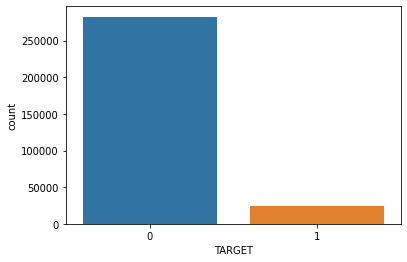

In [ ]:
sns.countplot(x = "TARGET", data = train)
train.loc[:, 'TARGET'].value_counts()

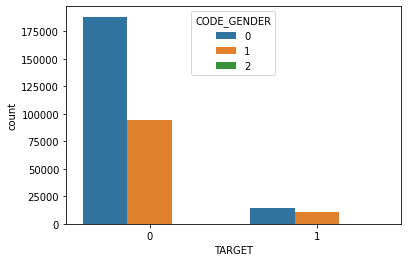

In [ ]:
sns.countplot(x='TARGET',hue='CODE_GENDER',data=train)

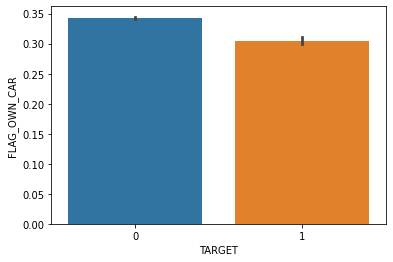

In [ ]:
sns.barplot(x='TARGET',y='FLAG_OWN_CAR',data=train)

In [ ]:
# pip install -U pandas-profiling

In [ ]:
# import pandas_profiling
# from pandas_profiling import ProfileReport 

In [ ]:
# profile = ProfileReport(train, title="Pandas Profiling Train Dataset Report")

In [ ]:
# profile

# Outliers

In [ ]:
numeric_feature = train.dtypes!=object
final_numeric_feature = train.columns[numeric_feature].tolist()

#----------------------------------------------------
numeric_feature_test = test.dtypes!=object
final_numeric_feature_test = test.columns[numeric_feature_test].tolist()

In [ ]:
numeric = train[final_numeric_feature]

#-------------------------------------------
numeric_test = test[final_numeric_feature_test]
numeric.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.000,0.000,0.000,0.0,0.00,1.00
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.000,0.000,0.000,0.0,0.00,0.00
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.000,0.000,0.000,0.0,0.00,0.00
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0.005,0.006,0.029,NaN,0.22,1.91
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.000,0.000,0.000,0.0,0.00,0.00


In [ ]:
discrete_features = numeric.dtypes==int
final_discrete_feature = numeric.columns[discrete_features].tolist()
discrete = numeric[final_discrete_feature]

#-------------------------------------------
discrete_features_test = numeric_test.dtypes==int
final_discrete_feature_test = numeric_test.columns[discrete_features_test].tolist()
discrete_test = numeric_test[final_discrete_feature_test]

discrete.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,-9461,-637,-2120,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,-16765,-1188,-291,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,-19046,-225,-2531,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,-19005,-3039,-2437,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,-19932,-3038,-3458,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
continuous_features = numeric.dtypes==float
final_continuous_feature = numeric.columns[continuous_features].tolist()
continuous = numeric[final_continuous_feature]

#-------------------------------------------
continuous_features_test = numeric_test.dtypes==float
final_continuous_feature_test = numeric_test.columns[continuous_features_test].tolist()
continuous_test = numeric_test[final_continuous_feature_test]

continuous.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,12.06,1.0,0.083037,0.262949,...,2.0,2.0,2.0,-1134.0,0.000,0.000,0.000,0.0,0.00,1.00
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,12.06,2.0,0.311267,0.622246,...,0.0,1.0,0.0,-828.0,0.000,0.000,0.000,0.0,0.00,0.00
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.00,1.0,0.500000,0.555912,...,0.0,0.0,0.0,-815.0,0.000,0.000,0.000,0.0,0.00,0.00
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,12.06,2.0,0.500000,0.650442,...,0.0,2.0,0.0,-617.0,0.005,0.006,0.029,NaN,0.22,1.91
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,12.06,1.0,0.500000,0.322738,...,0.0,0.0,0.0,-1106.0,0.000,0.000,0.000,0.0,0.00,0.00


In [ ]:
def outlier_detect(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    return df[((df[col] < (q1_col - 1.5 * iqr_col)) |(df[col] > (q3_col + 1.5 * iqr_col)))]

def lower_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    lower = df[(df[col] < (q1_col - 1.5 * iqr_col))]
    return lower


def upper_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    upper = df[(df[col] > (q3_col + 1.5 * iqr_col))]
    return upper

In [ ]:
continuous_col = continuous.columns

In [ ]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
def preprocess(df, col):
    print("*********************** {} ***********************\n".format(col))
    print("lower outlier: {} ****** upper outlier: {}\n".format(lower_outlier(df,col).shape[0], upper_outlier(df,col).shape[0]))
    plt.figure(figsize=(10,8))
    plt.subplot(2,1,1)
    df[col].plot(kind='box', subplots=True, sharex=False, vert=False)
    plt.subplot(2,1,2)
    df[col].plot(kind='density', subplots=True, sharex=False)
    plt.show()

*********************** AMT_INCOME_TOTAL ***********************

lower outlier: 0 ****** upper outlier: 14035



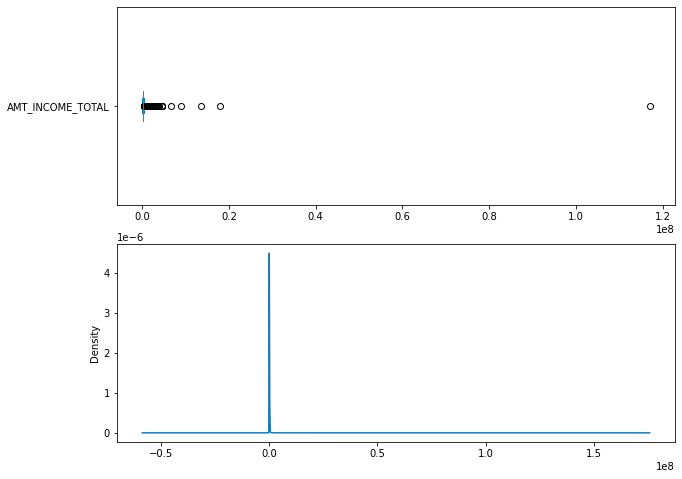

*********************** AMT_CREDIT ***********************

lower outlier: 0 ****** upper outlier: 6562



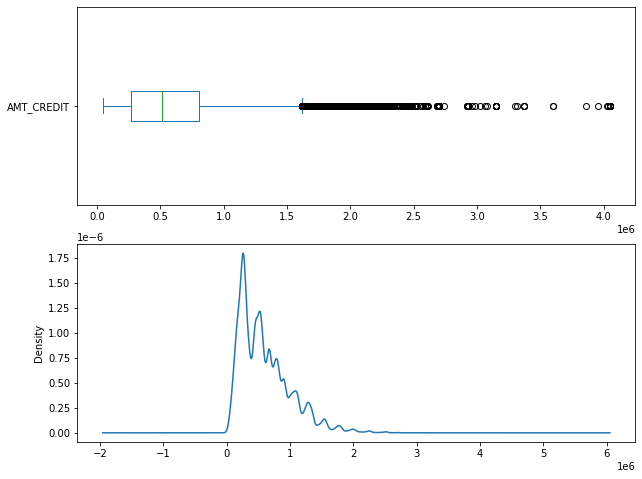

*********************** AMT_ANNUITY ***********************

lower outlier: 0 ****** upper outlier: 7504



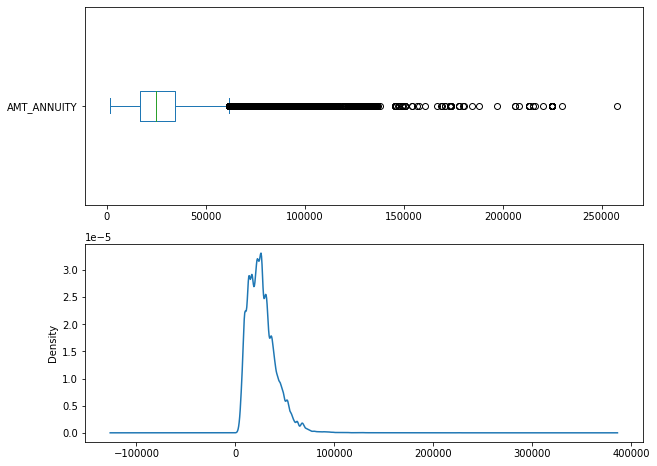

*********************** AMT_GOODS_PRICE ***********************

lower outlier: 0 ****** upper outlier: 14728



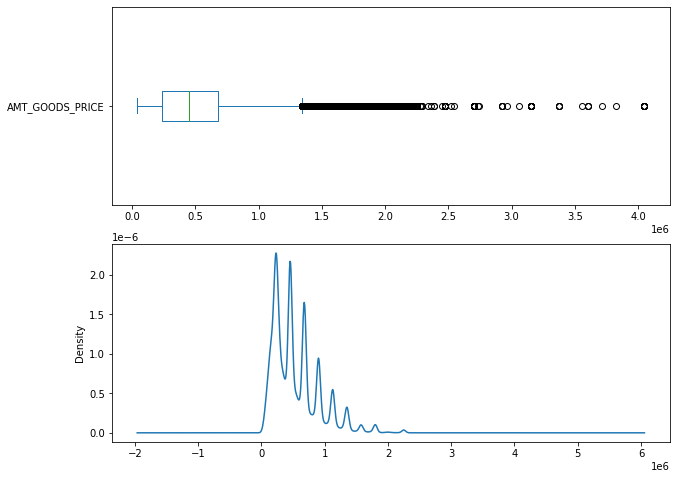

*********************** REGION_POPULATION_RELATIVE ***********************

lower outlier: 0 ****** upper outlier: 8412



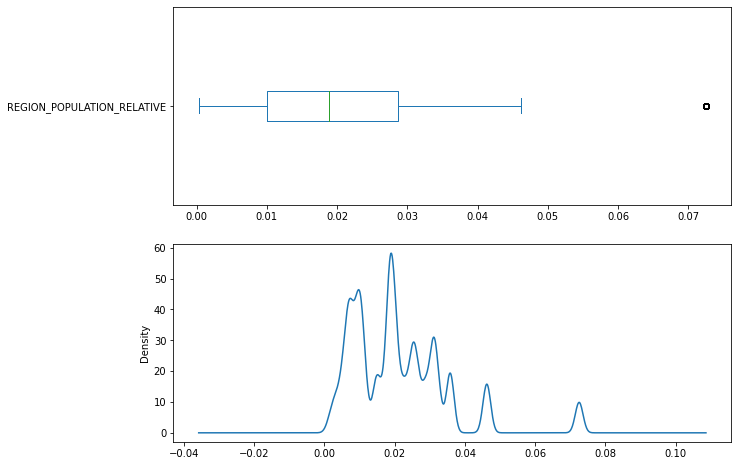

*********************** DAYS_REGISTRATION ***********************

lower outlier: 659 ****** upper outlier: 0



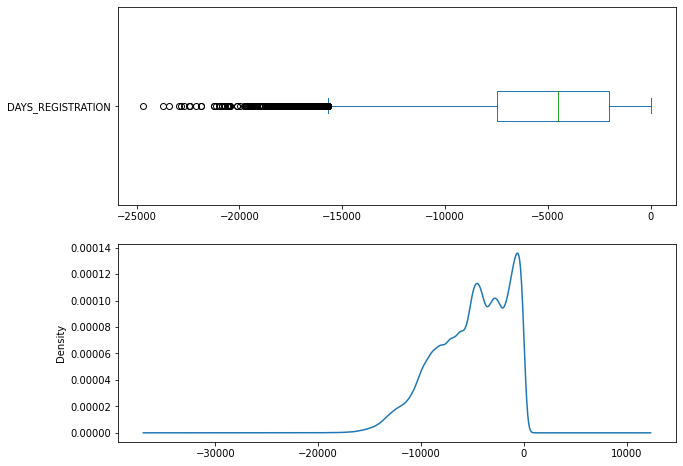

*********************** OWN_CAR_AGE ***********************

lower outlier: 66725 ****** upper outlier: 37857



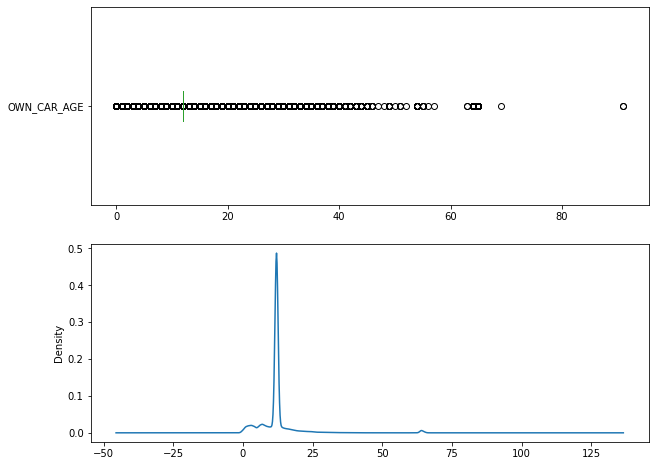

*********************** CNT_FAM_MEMBERS ***********************

lower outlier: 0 ****** upper outlier: 4007



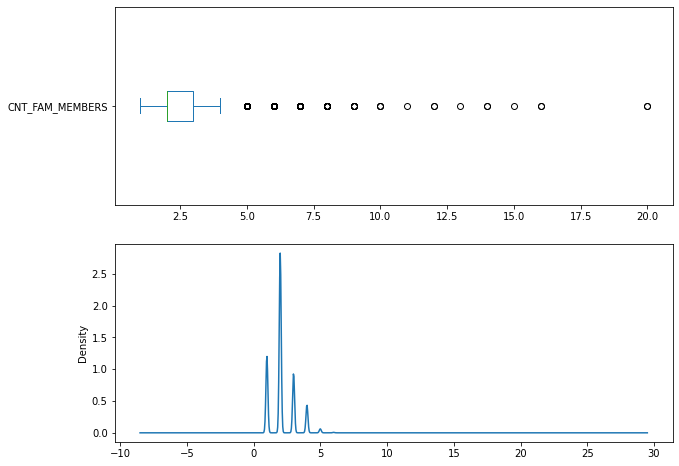

*********************** EXT_SOURCE_1 ***********************

lower outlier: 65879 ****** upper outlier: 68254



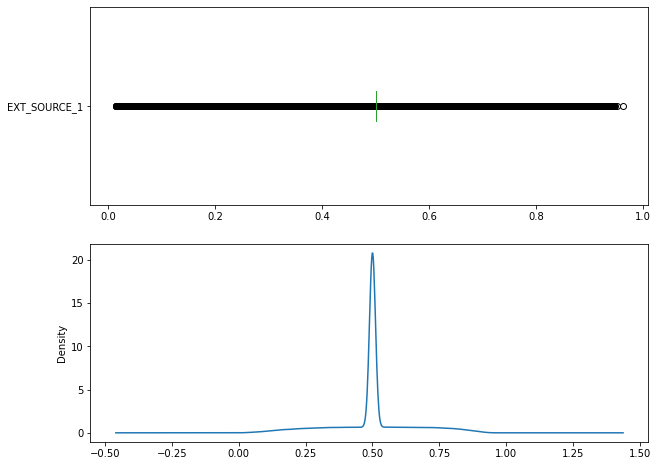

*********************** EXT_SOURCE_2 ***********************

lower outlier: 0 ****** upper outlier: 0



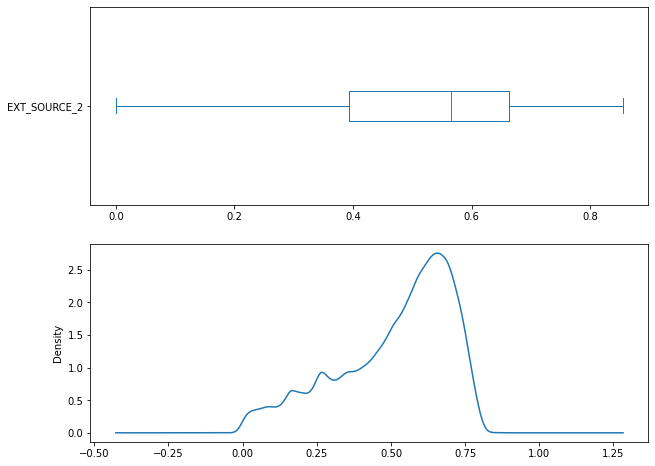

*********************** EXT_SOURCE_3 ***********************

lower outlier: 4313 ****** upper outlier: 0



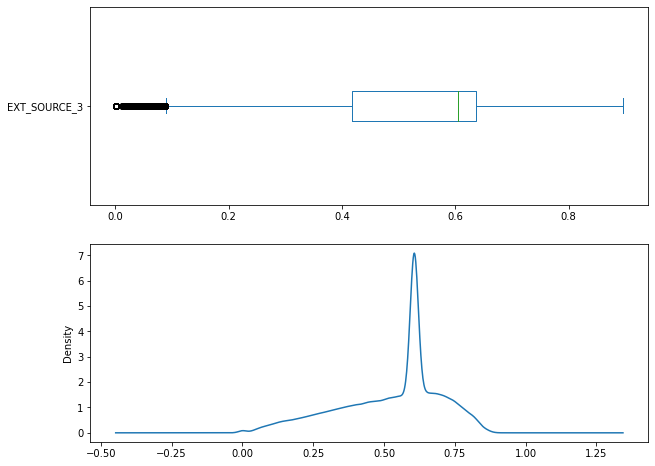

*********************** APARTMENTS_AVG ***********************

lower outlier: 38888 ****** upper outlier: 41113



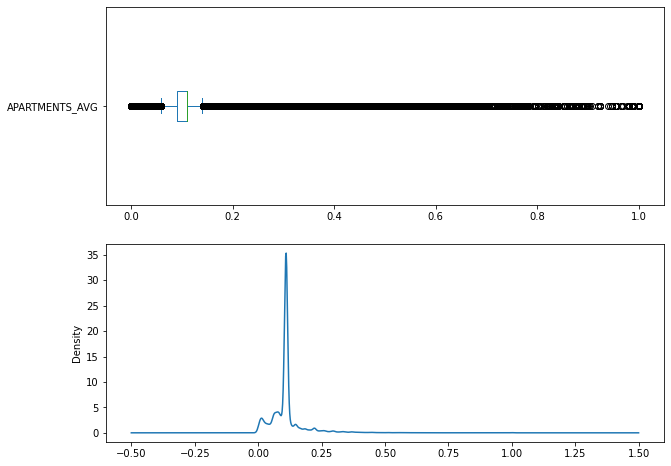

*********************** BASEMENTAREA_AVG ***********************

lower outlier: 68956 ****** upper outlier: 58373



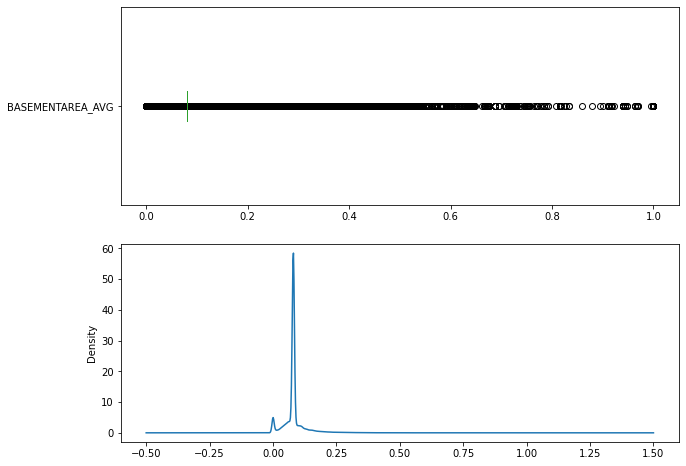

*********************** YEARS_BEGINEXPLUATATION_AVG ***********************

lower outlier: 2659 ****** upper outlier: 0



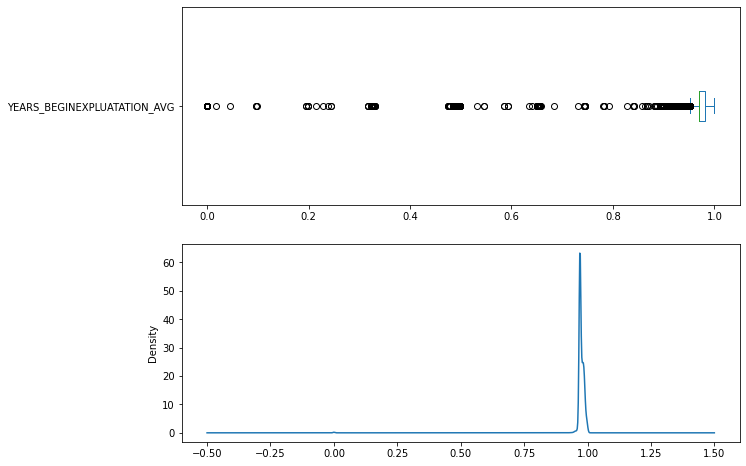

*********************** YEARS_BUILD_AVG ***********************

lower outlier: 49900 ****** upper outlier: 53123



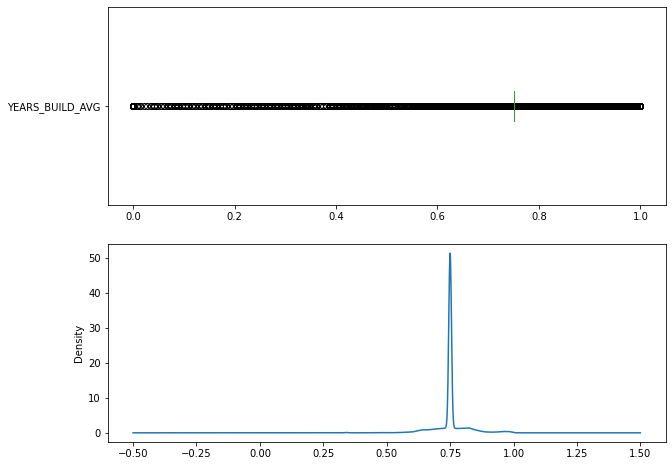

*********************** COMMONAREA_AVG ***********************

lower outlier: 65317 ****** upper outlier: 27274



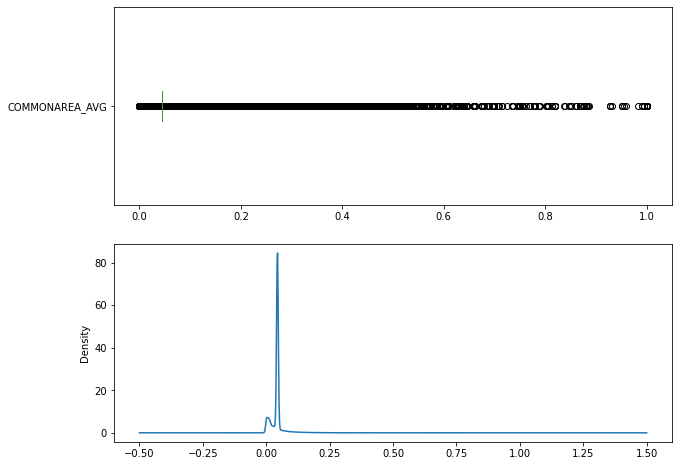

*********************** ELEVATORS_AVG ***********************

lower outlier: 0 ****** upper outlier: 24332



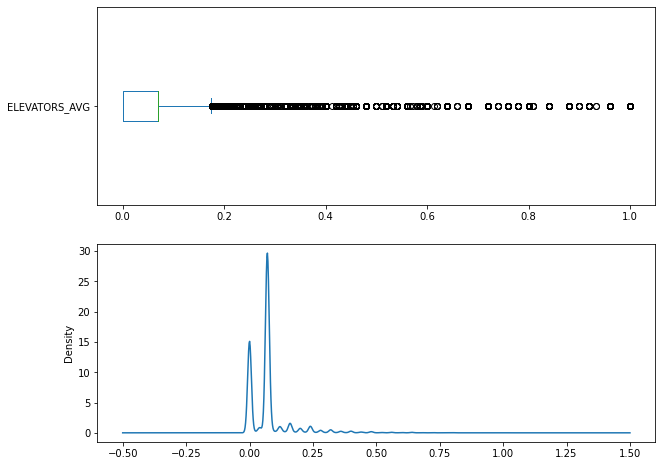

*********************** ENTRANCES_AVG ***********************

lower outlier: 64664 ****** upper outlier: 53982



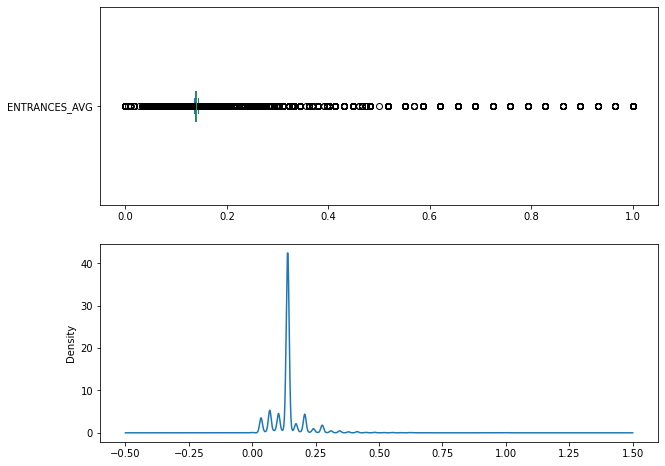

*********************** FLOORSMAX_AVG ***********************

lower outlier: 24604 ****** upper outlier: 53429



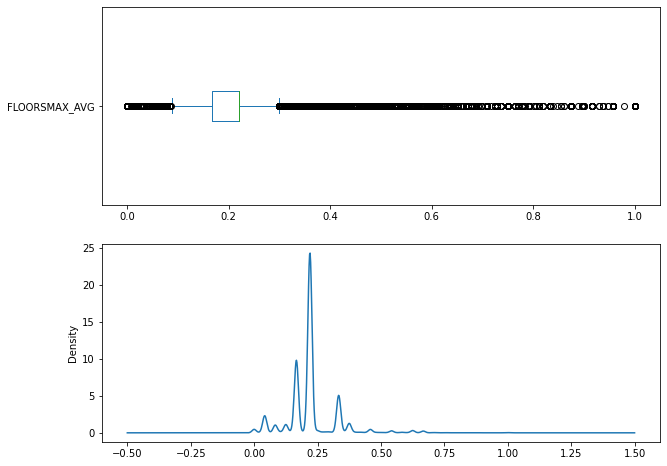

*********************** FLOORSMIN_AVG ***********************

lower outlier: 66357 ****** upper outlier: 32512



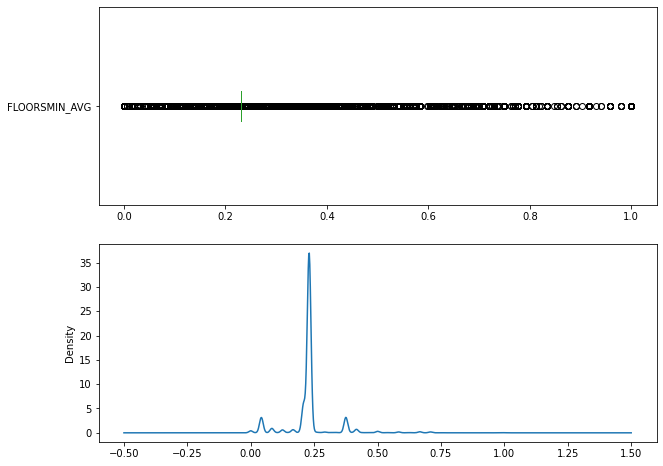

*********************** LANDAREA_AVG ***********************

lower outlier: 74179 ****** upper outlier: 50674



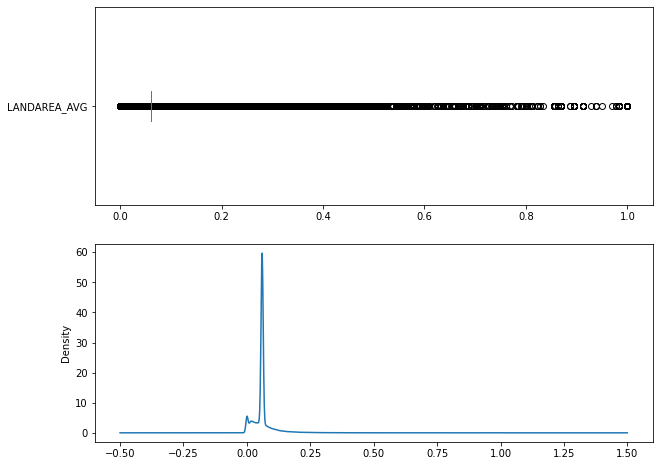

*********************** LIVINGAPARTMENTS_AVG ***********************

lower outlier: 63140 ****** upper outlier: 33126



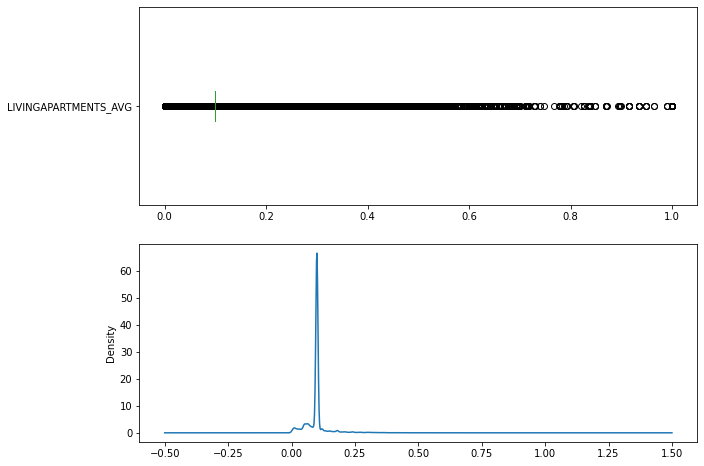

*********************** LIVINGAREA_AVG ***********************

lower outlier: 31794 ****** upper outlier: 36067



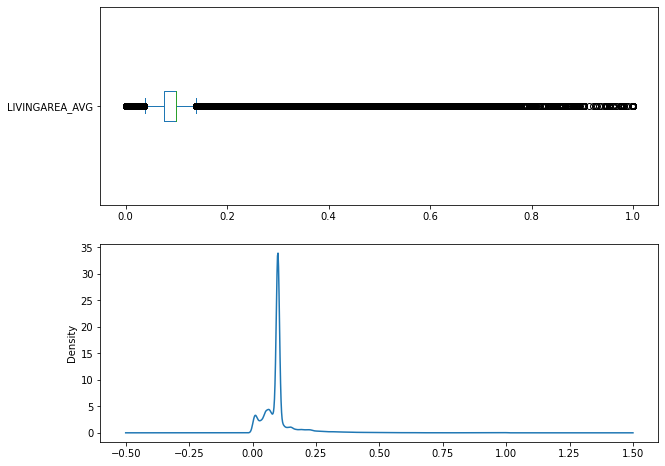

*********************** NONLIVINGAPARTMENTS_AVG ***********************

lower outlier: 71473 ****** upper outlier: 15513



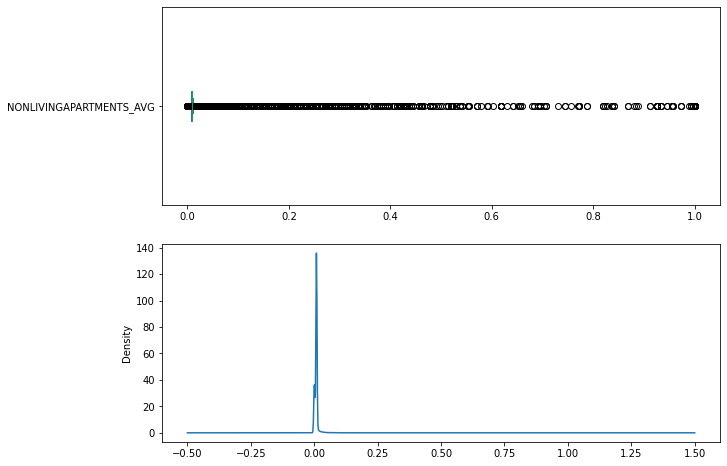

*********************** NONLIVINGAREA_AVG ***********************

lower outlier: 0 ****** upper outlier: 26797



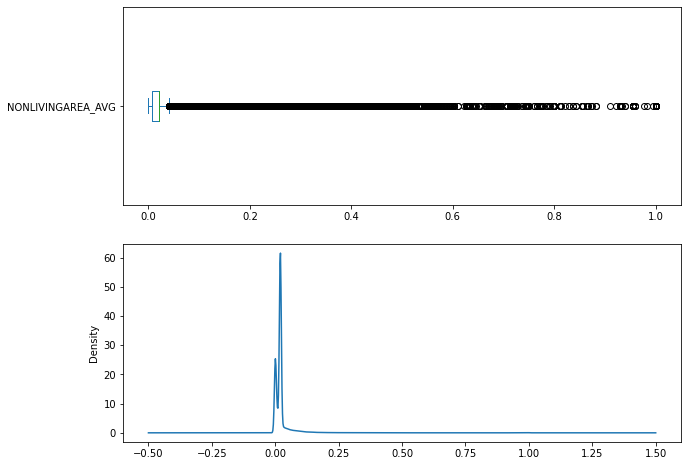

*********************** APARTMENTS_MODE ***********************

lower outlier: 33857 ****** upper outlier: 36544



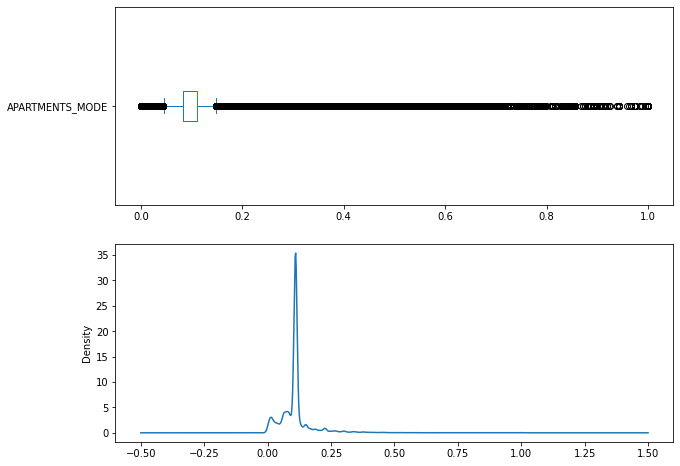

*********************** BASEMENTAREA_MODE ***********************

lower outlier: 68714 ****** upper outlier: 58759



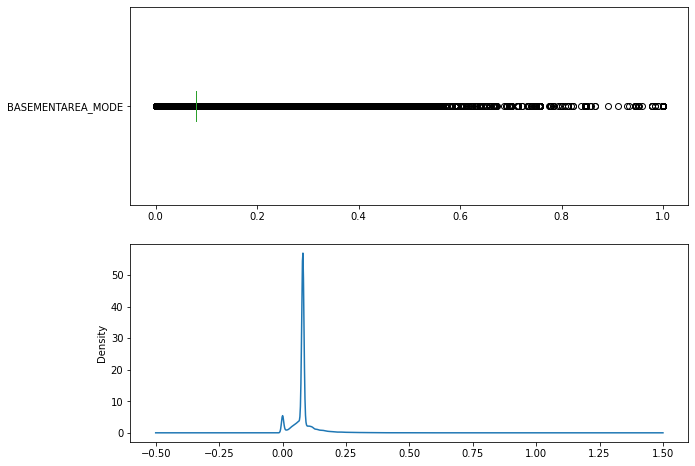

*********************** YEARS_BEGINEXPLUATATION_MODE ***********************

lower outlier: 2875 ****** upper outlier: 913



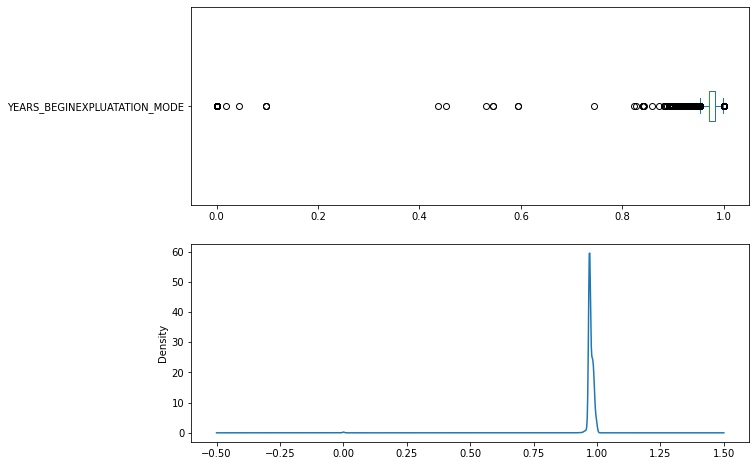

*********************** YEARS_BUILD_MODE ***********************

lower outlier: 45769 ****** upper outlier: 57254



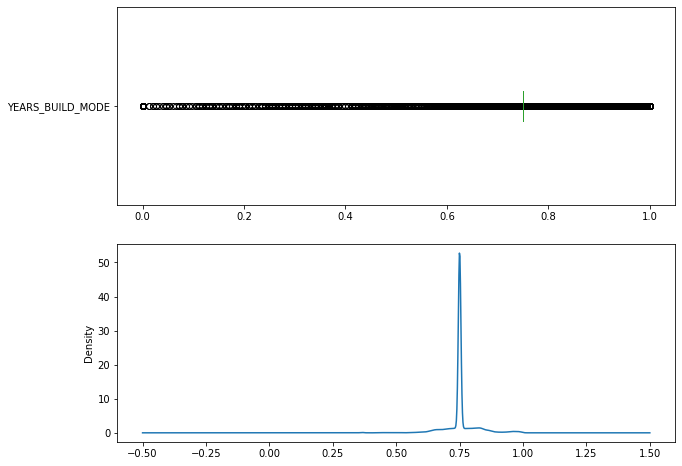

*********************** COMMONAREA_MODE ***********************

lower outlier: 65487 ****** upper outlier: 27095



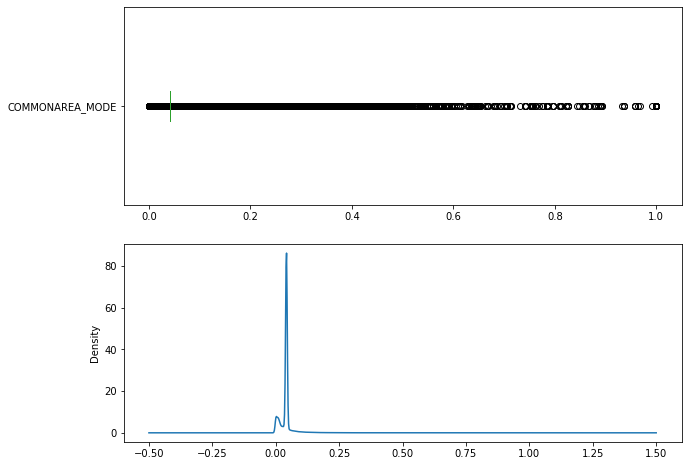

*********************** ELEVATORS_MODE ***********************

lower outlier: 0 ****** upper outlier: 22208



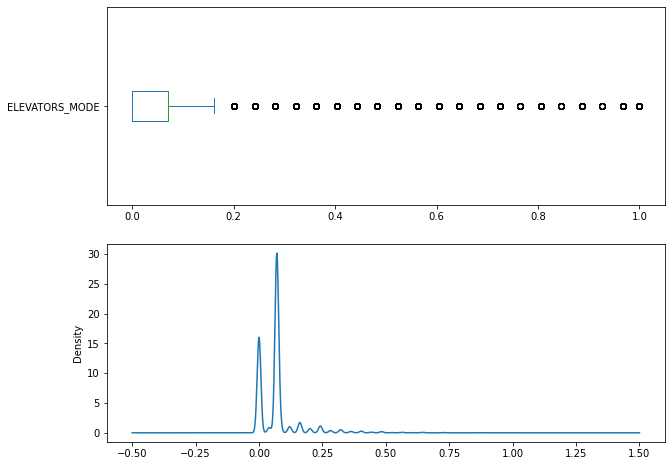

*********************** ENTRANCES_MODE ***********************

lower outlier: 67052 ****** upper outlier: 49590



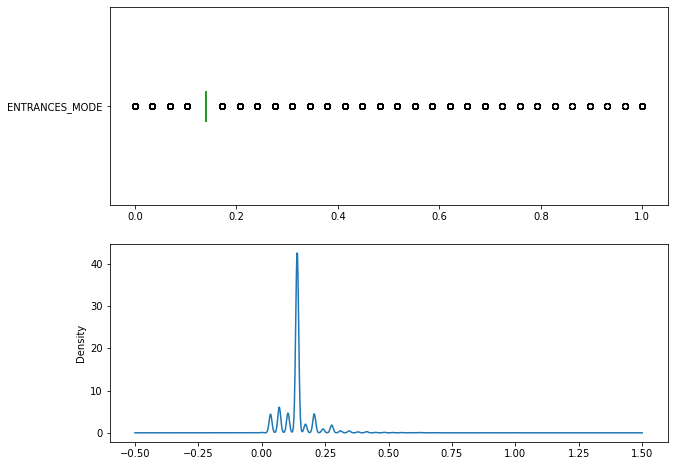

*********************** FLOORSMAX_MODE ***********************

lower outlier: 25816 ****** upper outlier: 53270



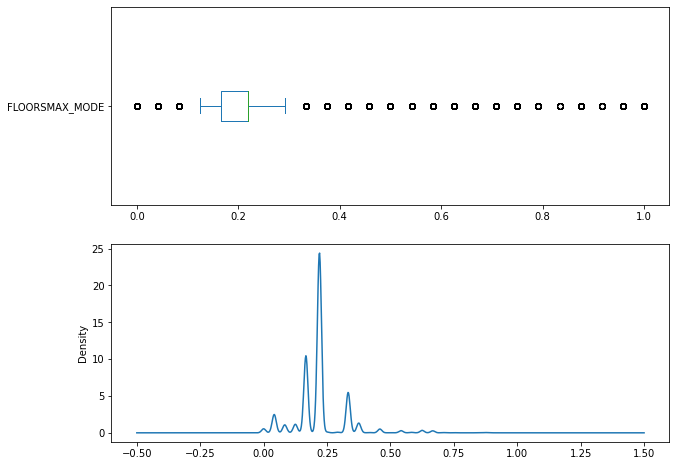

*********************** FLOORSMIN_MODE ***********************

lower outlier: 67992 ****** upper outlier: 30877



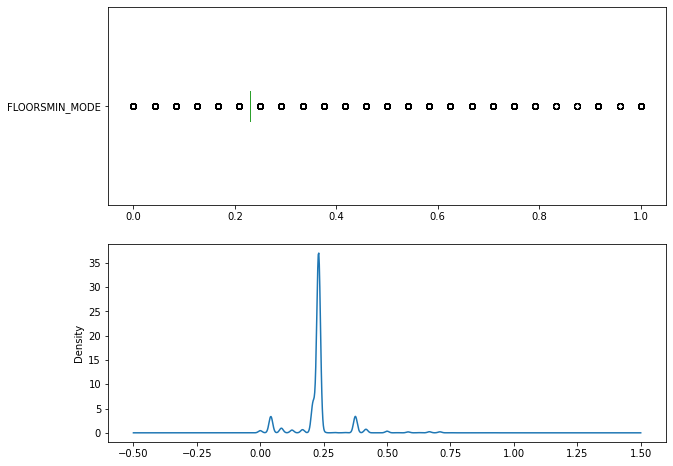

*********************** LANDAREA_MODE ***********************

lower outlier: 75931 ****** upper outlier: 48890



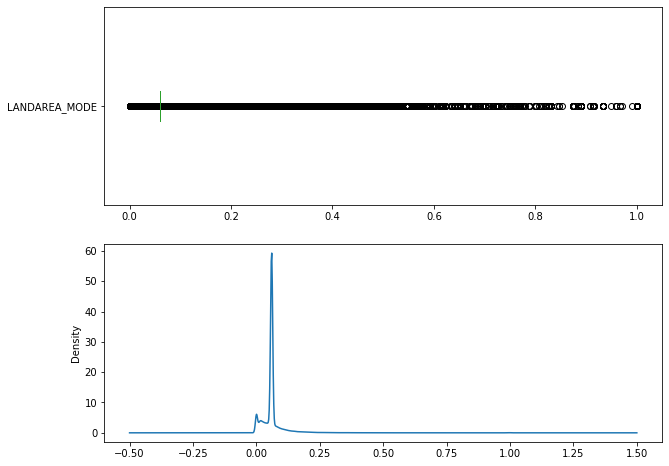

*********************** LIVINGAPARTMENTS_MODE ***********************

lower outlier: 62310 ****** upper outlier: 35002



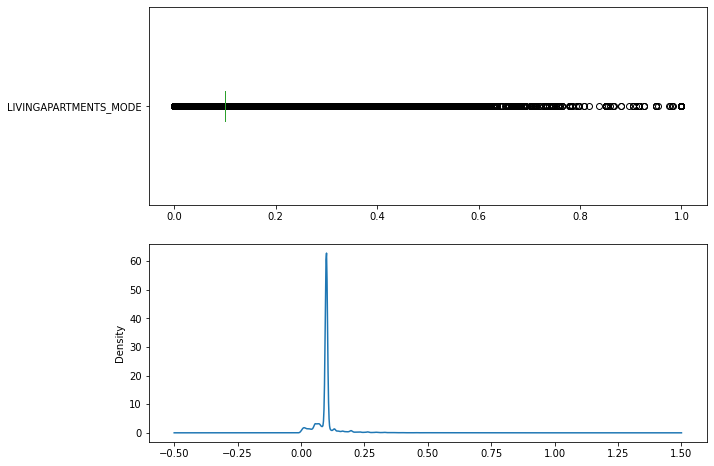

*********************** LIVINGAREA_MODE ***********************

lower outlier: 30632 ****** upper outlier: 33758



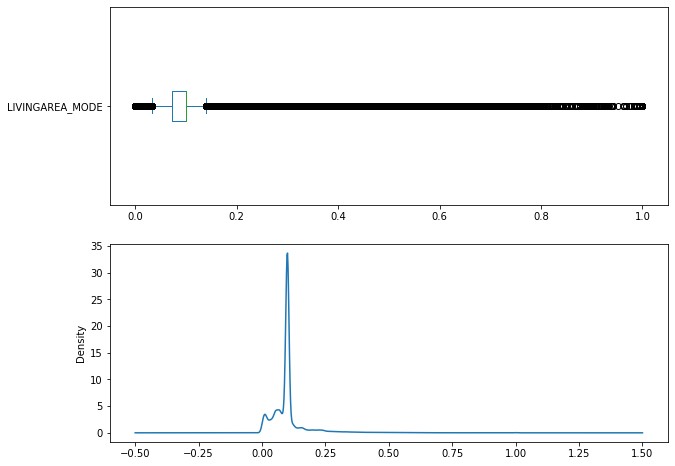

*********************** NONLIVINGAPARTMENTS_MODE ***********************

lower outlier: 73360 ****** upper outlier: 14224



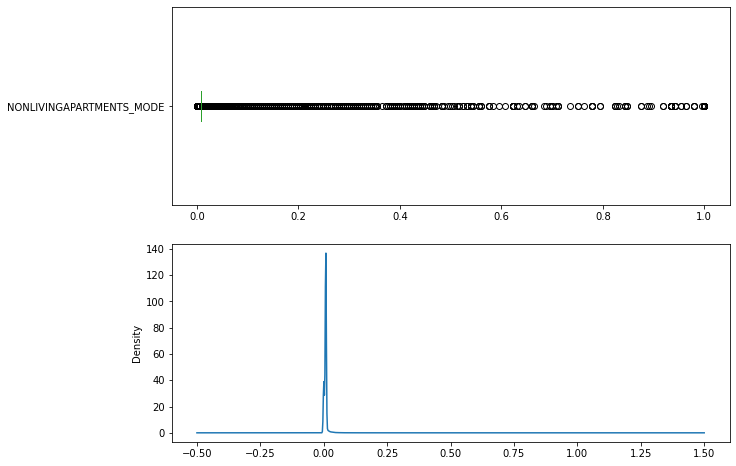

*********************** NONLIVINGAREA_MODE ***********************

lower outlier: 0 ****** upper outlier: 23644



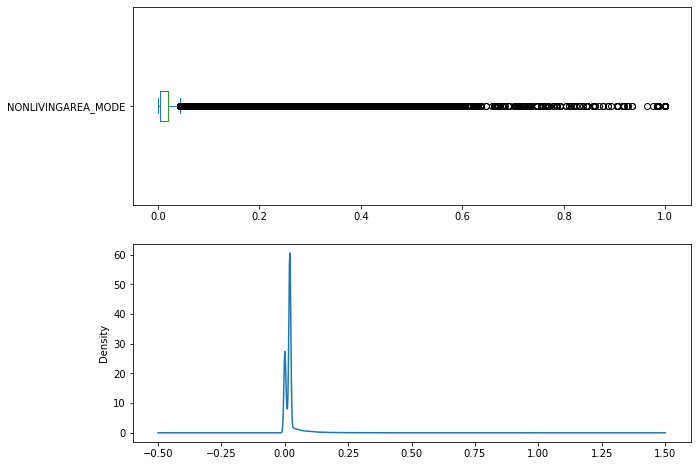

*********************** APARTMENTS_MEDI ***********************

lower outlier: 37185 ****** upper outlier: 40605



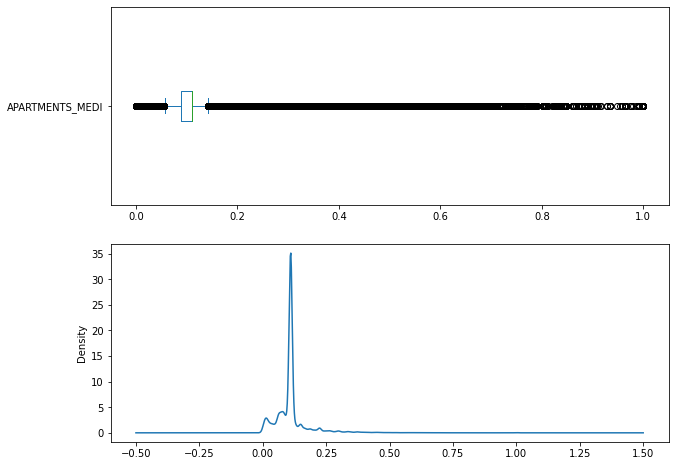

*********************** BASEMENTAREA_MEDI ***********************

lower outlier: 69348 ****** upper outlier: 57980



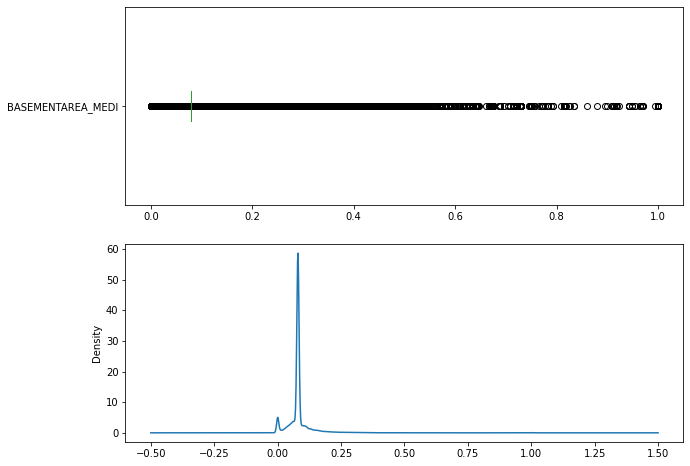

*********************** YEARS_BEGINEXPLUATATION_MEDI ***********************

lower outlier: 2627 ****** upper outlier: 0



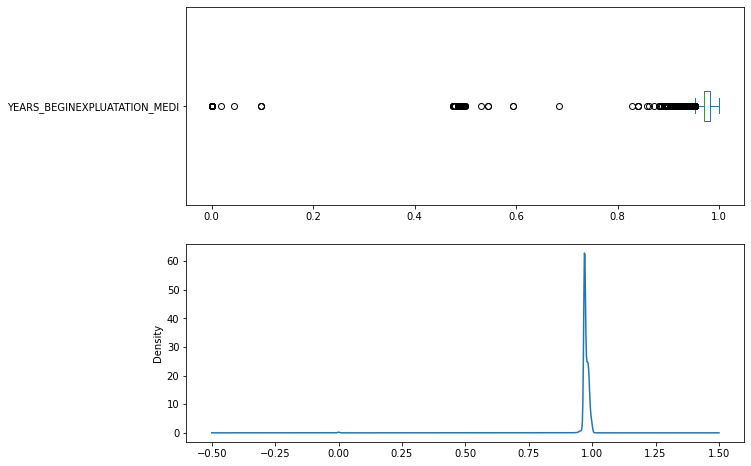

*********************** YEARS_BUILD_MEDI ***********************

lower outlier: 47294 ****** upper outlier: 55729



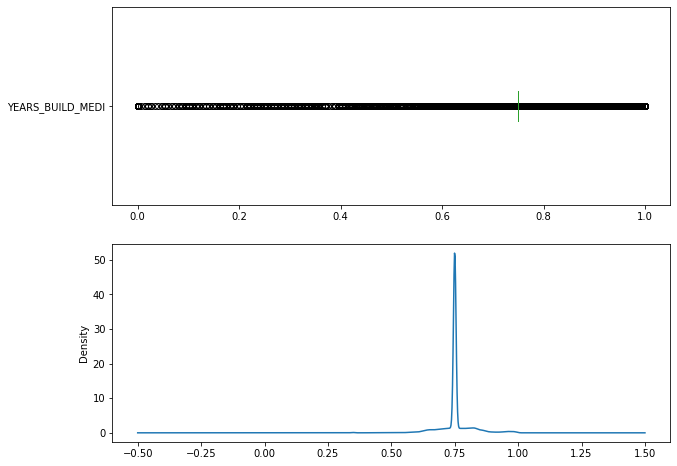

*********************** COMMONAREA_MEDI ***********************

lower outlier: 65366 ****** upper outlier: 27231



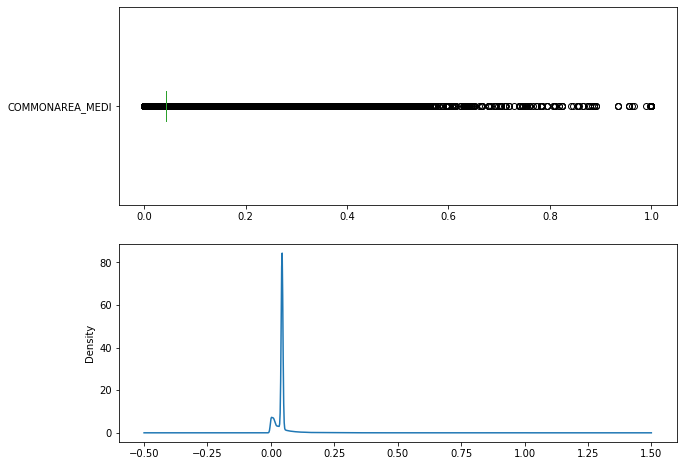

*********************** ELEVATORS_MEDI ***********************

lower outlier: 0 ****** upper outlier: 23999



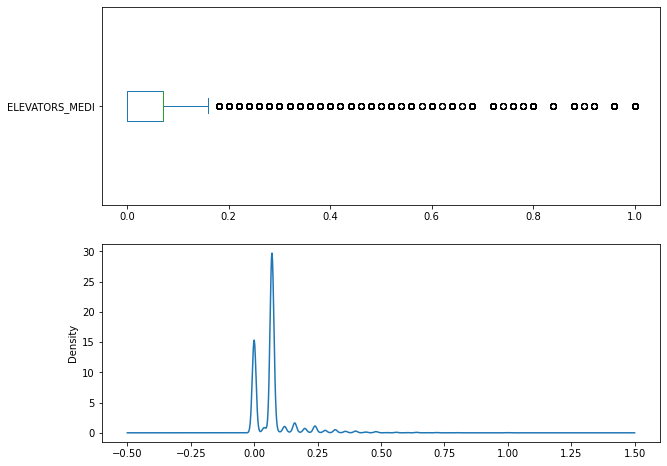

*********************** ENTRANCES_MEDI ***********************

lower outlier: 64362 ****** upper outlier: 52786



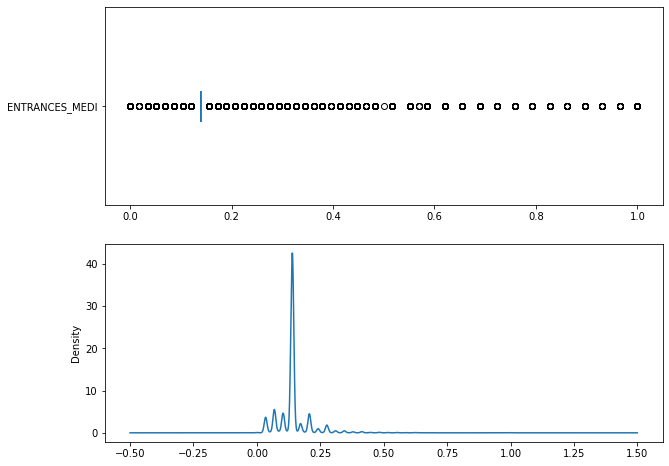

*********************** FLOORSMAX_MEDI ***********************

lower outlier: 24742 ****** upper outlier: 53823



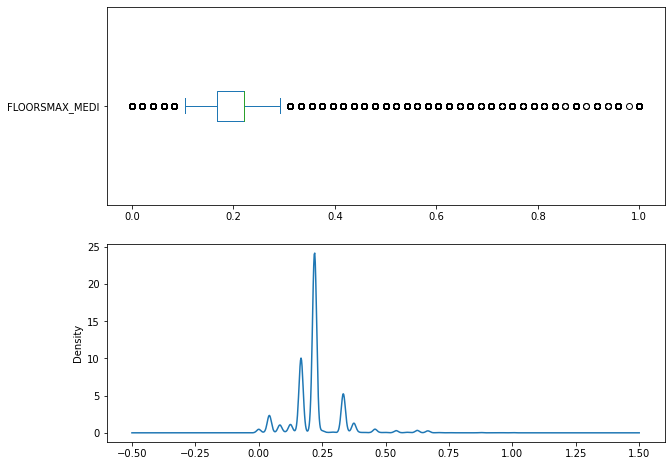

*********************** FLOORSMIN_MEDI ***********************

lower outlier: 66919 ****** upper outlier: 31950



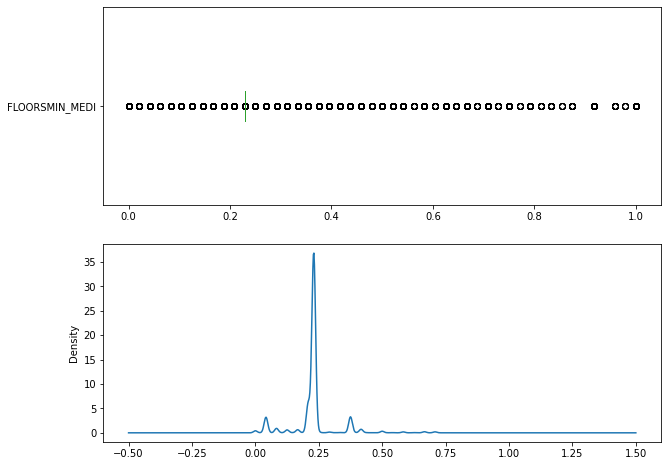

*********************** LANDAREA_MEDI ***********************

lower outlier: 73428 ****** upper outlier: 51391



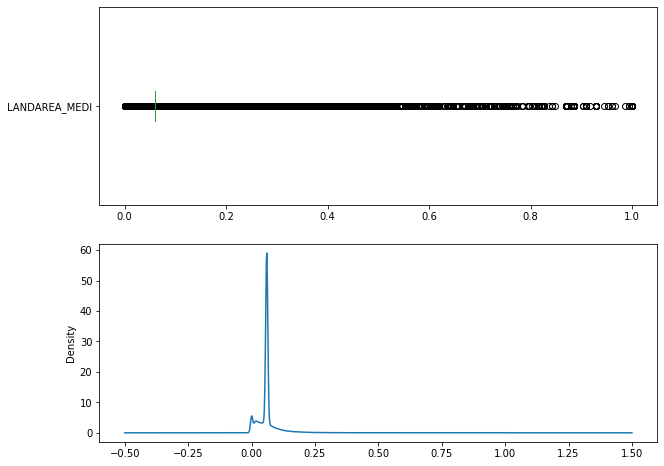

*********************** LIVINGAPARTMENTS_MEDI ***********************

lower outlier: 62734 ****** upper outlier: 34279



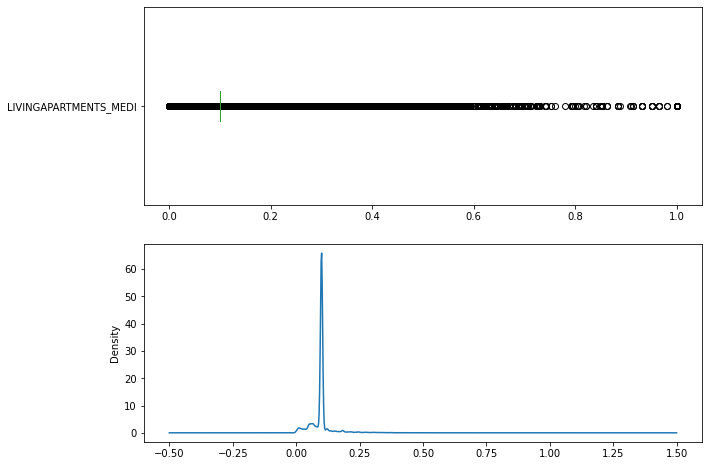

*********************** LIVINGAREA_MEDI ***********************

lower outlier: 0 ****** upper outlier: 3401



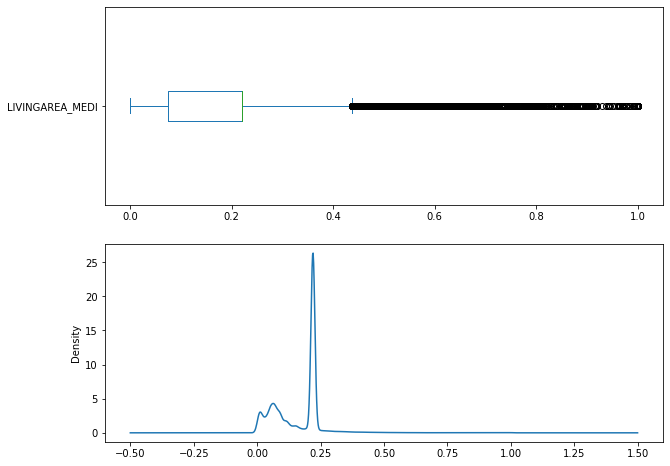

*********************** NONLIVINGAPARTMENTS_MEDI ***********************

lower outlier: 72024 ****** upper outlier: 15215



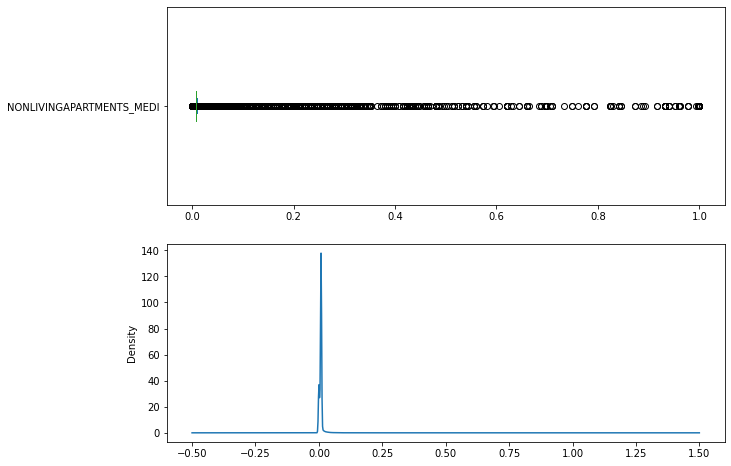

*********************** NONLIVINGAREA_MEDI ***********************

lower outlier: 0 ****** upper outlier: 26011



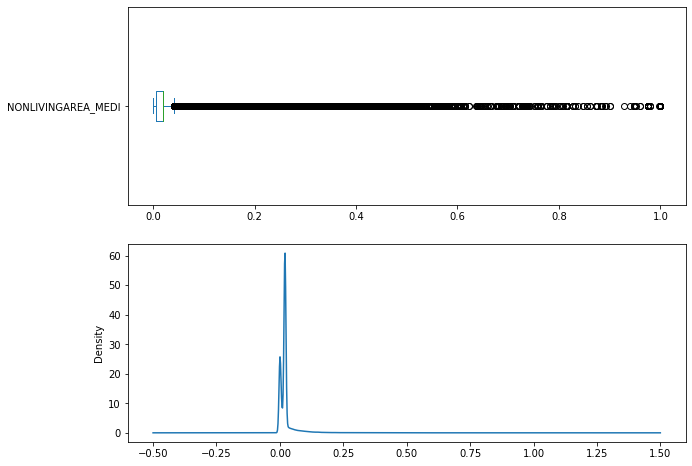

*********************** TOTALAREA_MODE ***********************

lower outlier: 20997 ****** upper outlier: 33985



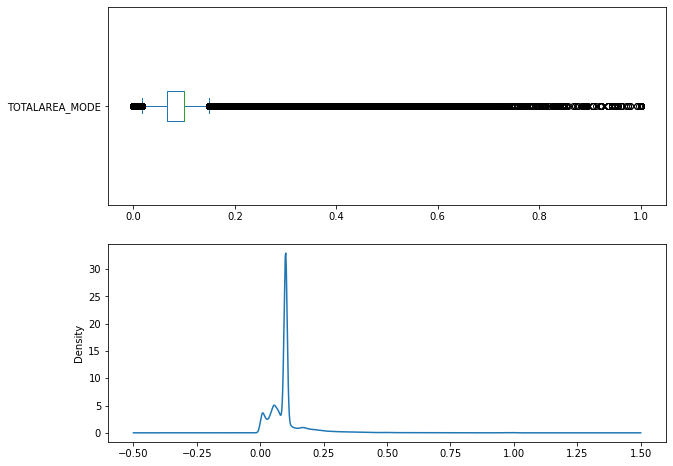

*********************** OBS_30_CNT_SOCIAL_CIRCLE ***********************

lower outlier: 0 ****** upper outlier: 19971



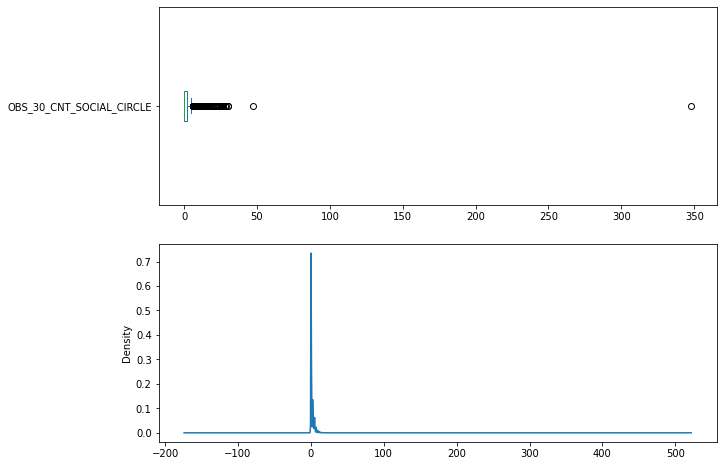

*********************** DEF_30_CNT_SOCIAL_CIRCLE ***********************

lower outlier: 0 ****** upper outlier: 36187



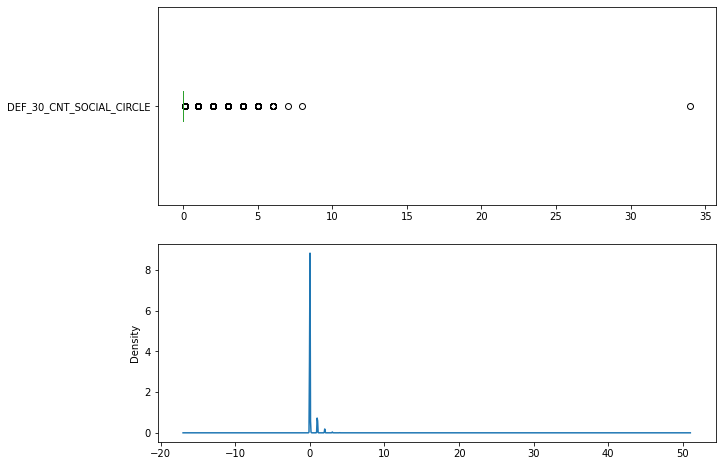

*********************** OBS_60_CNT_SOCIAL_CIRCLE ***********************

lower outlier: 0 ****** upper outlier: 19564



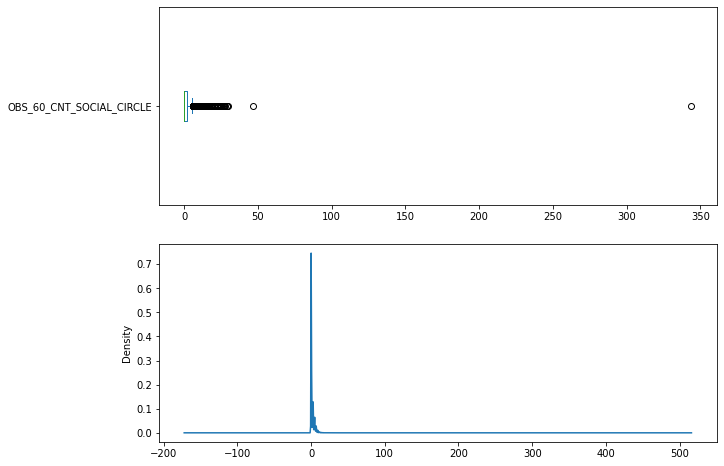

*********************** DEF_60_CNT_SOCIAL_CIRCLE ***********************

lower outlier: 0 ****** upper outlier: 26790



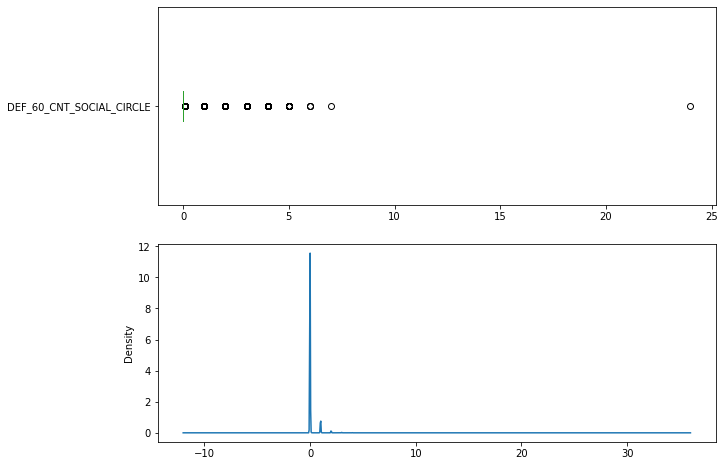

*********************** DAYS_LAST_PHONE_CHANGE ***********************

lower outlier: 435 ****** upper outlier: 0



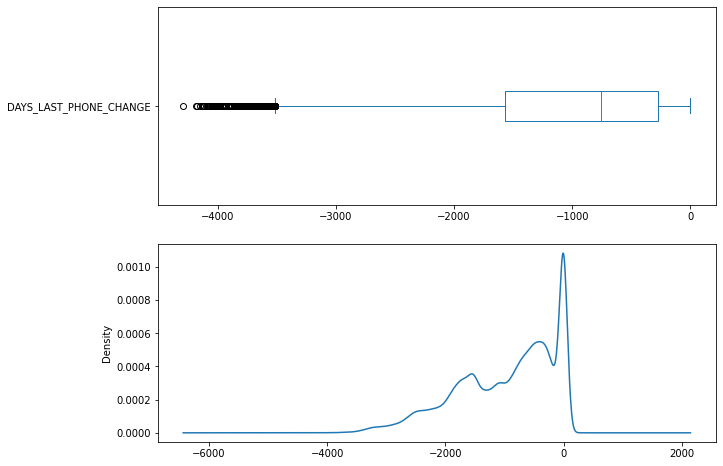

*********************** AMT_REQ_CREDIT_BUREAU_HOUR ***********************

lower outlier: 0 ****** upper outlier: 43145



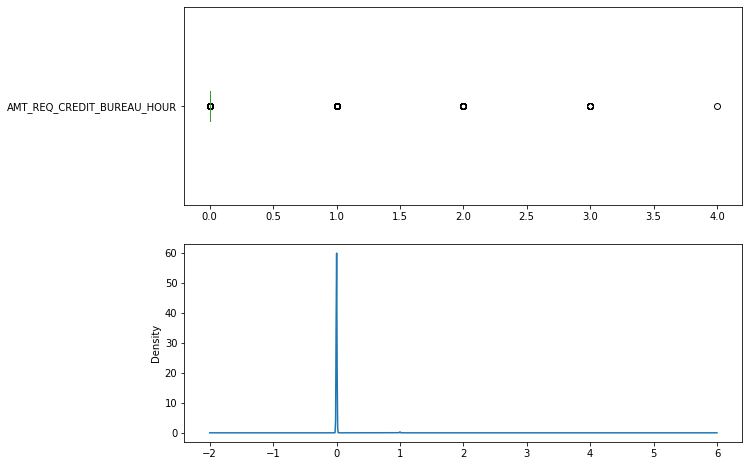

*********************** AMT_REQ_CREDIT_BUREAU_DAY ***********************

lower outlier: 0 ****** upper outlier: 43008



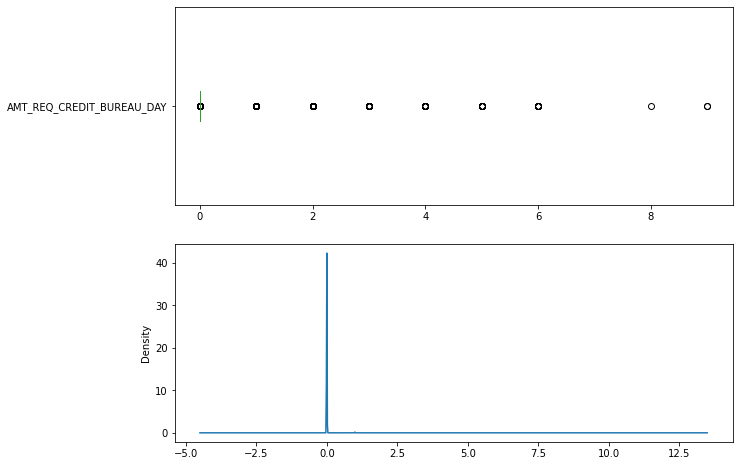

*********************** AMT_REQ_CREDIT_BUREAU_WEEK ***********************

lower outlier: 0 ****** upper outlier: 50055



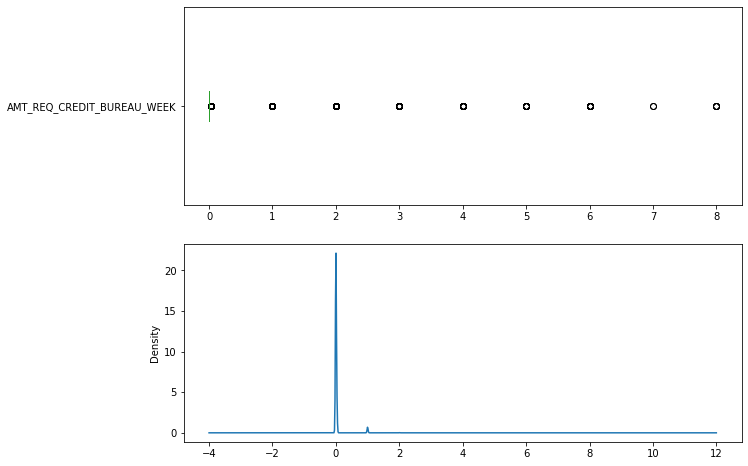

*********************** AMT_REQ_CREDIT_BUREAU_MON ***********************

lower outlier: 0 ****** upper outlier: 43759



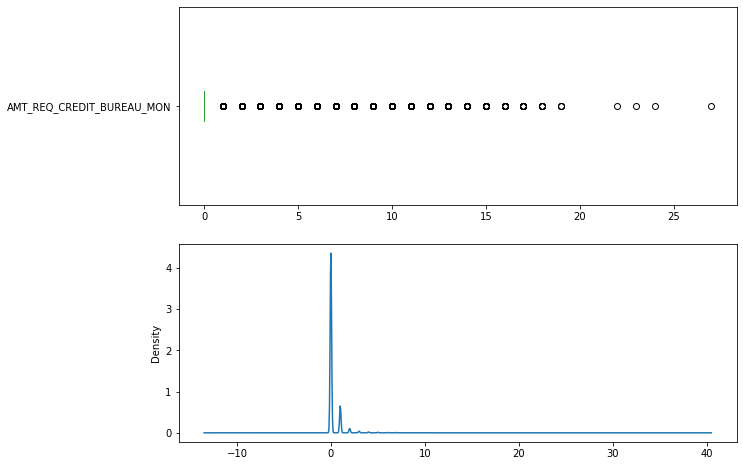

*********************** AMT_REQ_CREDIT_BUREAU_QRT ***********************

lower outlier: 0 ****** upper outlier: 50575



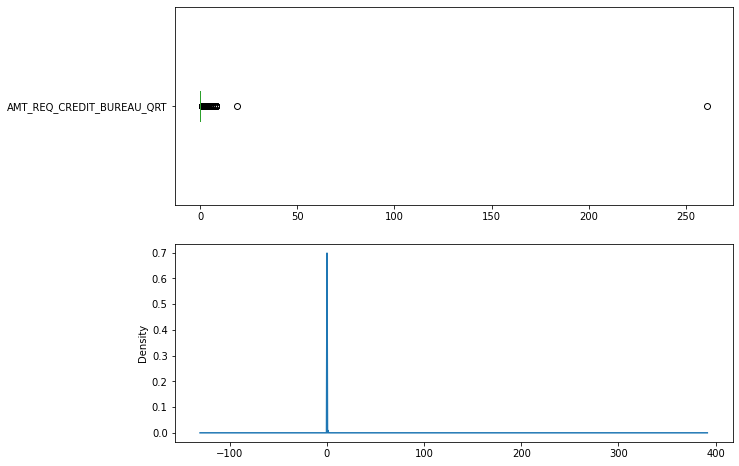

*********************** AMT_REQ_CREDIT_BUREAU_YEAR ***********************

lower outlier: 0 ****** upper outlier: 7233



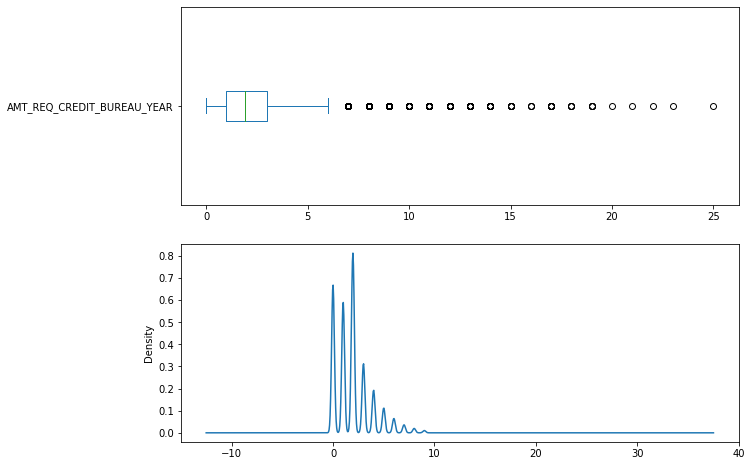

In [ ]:
for i in range(len(continuous_col)):
    preprocess(continuous[continuous_col], continuous_col[i])

In [ ]:
col_names = numeric.columns

# ------------------------------------
col_names_test = numeric_test.columns

In [ ]:
print("In train:\n")
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(outlier_detect(numeric,col_names[i]).shape[0])))
    
print("\n\n***************************************\n")
print("In test:\n")
for i in range(len(col_names_test)):
    print("{}: {}".format(col_names_test[i],(outlier_detect(numeric_test,col_names_test[i]).shape[0])))

In train:

SK_ID_CURR: 0
TARGET: 24825
CNT_CHILDREN: 4272
AMT_INCOME_TOTAL: 14035
AMT_CREDIT: 6562
AMT_ANNUITY: 7504
AMT_GOODS_PRICE: 14728
REGION_POPULATION_RELATIVE: 8412
DAYS_BIRTH: 0
DAYS_EMPLOYED: 72217
DAYS_REGISTRATION: 659
DAYS_ID_PUBLISH: 0
OWN_CAR_AGE: 104582
FLAG_MOBIL: 1
FLAG_EMP_PHONE: 55386
FLAG_WORK_PHONE: 61308
FLAG_CONT_MOBILE: 574
FLAG_PHONE: 0
FLAG_EMAIL: 17442
CNT_FAM_MEMBERS: 4007
REGION_RATING_CLIENT: 80527
REGION_RATING_CLIENT_W_CITY: 78027
HOUR_APPR_PROCESS_START: 2257
REG_REGION_NOT_LIVE_REGION: 4657
REG_REGION_NOT_WORK_REGION: 15612
LIVE_REGION_NOT_WORK_REGION: 12503
REG_CITY_NOT_LIVE_CITY: 24039
REG_CITY_NOT_WORK_CITY: 70867
LIVE_CITY_NOT_WORK_CITY: 55215
EXT_SOURCE_1: 134133
EXT_SOURCE_2: 0
EXT_SOURCE_3: 4313
APARTMENTS_AVG: 80001
BASEMENTAREA_AVG: 127329
YEARS_BEGINEXPLUATATION_AVG: 2659
YEARS_BUILD_AVG: 103023
COMMONAREA_AVG: 92591
ELEVATORS_AVG: 24332
ENTRANCES_AVG: 118646
FLOORSMAX_AVG: 78033
FLOORSMIN_AVG: 98869
LANDAREA_AVG: 124853
LIVINGAPARTMENTS_AVG

In [ ]:
outlier = []
for i in range(len(final_numeric_feature)):
    if outlier_detect(numeric[final_numeric_feature],final_numeric_feature[i]).shape[0] !=0:
        outlier.append(final_numeric_feature[i])

outlier_test = []
for i in range(len(final_numeric_feature_test)):
    if outlier_detect(numeric_test[final_numeric_feature_test],final_numeric_feature_test[i]).shape[0] !=0:
        outlier_test.append(final_numeric_feature_test[i])

In [ ]:
# without TARGET field
col_names = outlier_test

In [ ]:
print("In train:\n")
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(upper_outlier(numeric,col_names[i]).shape[0])))
    
print("\n\n****************************************\n")
print("In test:\n")
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(upper_outlier(numeric_test,col_names[i]).shape[0])))

In train:

CNT_CHILDREN: 4272
AMT_INCOME_TOTAL: 14035
AMT_CREDIT: 6562
AMT_ANNUITY: 7504
AMT_GOODS_PRICE: 14728
REGION_POPULATION_RELATIVE: 8412
DAYS_EMPLOYED: 55374
DAYS_REGISTRATION: 0
OWN_CAR_AGE: 37857
FLAG_MOBIL: 0
FLAG_EMP_PHONE: 0
FLAG_WORK_PHONE: 61308
FLAG_CONT_MOBILE: 0
FLAG_EMAIL: 17442
CNT_FAM_MEMBERS: 4007
REGION_RATING_CLIENT: 48330
REGION_RATING_CLIENT_W_CITY: 43860
HOUR_APPR_PROCESS_START: 596
REG_REGION_NOT_LIVE_REGION: 4657
REG_REGION_NOT_WORK_REGION: 15612
LIVE_REGION_NOT_WORK_REGION: 12503
REG_CITY_NOT_LIVE_CITY: 24039
REG_CITY_NOT_WORK_CITY: 70867
LIVE_CITY_NOT_WORK_CITY: 55215
EXT_SOURCE_1: 68254
EXT_SOURCE_3: 0
APARTMENTS_AVG: 41113
BASEMENTAREA_AVG: 58373
YEARS_BEGINEXPLUATATION_AVG: 0
YEARS_BUILD_AVG: 53123
COMMONAREA_AVG: 27274
ELEVATORS_AVG: 24332
ENTRANCES_AVG: 53982
FLOORSMAX_AVG: 53429
FLOORSMIN_AVG: 32512
LANDAREA_AVG: 50674
LIVINGAPARTMENTS_AVG: 33126
LIVINGAREA_AVG: 36067
NONLIVINGAPARTMENTS_AVG: 15513
NONLIVINGAREA_AVG: 26797
APARTMENTS_MODE: 36544
BAS

In [ ]:
def replace_upper(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 9999999
    upper = q3_col + 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x < (upper)), tmp)
    df[col] = df[col].replace(tmp, upper)

# ----------------------------------------------------------

def replace_lower(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 1111111
    lower = q1_col - 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x > (lower)), tmp)
    df[col] = df[col].replace(tmp, lower)

***Upper Outlier***

In [ ]:
for i in range(len(col_names)):
    replace_upper(numeric, col_names[i])   
    
#------------------------------------------------------
for i in range(len(col_names)):
    replace_upper(numeric_test, col_names[i])   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("In train:\n")
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(upper_outlier(numeric,col_names[i]).shape[0])))
    
print("\n\n****************************************\n")
print("In test:\n")
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(upper_outlier(numeric_test,col_names[i]).shape[0])))

In train:

CNT_CHILDREN: 0
AMT_INCOME_TOTAL: 0
AMT_CREDIT: 0
AMT_ANNUITY: 0
AMT_GOODS_PRICE: 0
REGION_POPULATION_RELATIVE: 0
DAYS_EMPLOYED: 0
DAYS_REGISTRATION: 0
OWN_CAR_AGE: 0
FLAG_MOBIL: 0
FLAG_EMP_PHONE: 0
FLAG_WORK_PHONE: 0
FLAG_CONT_MOBILE: 0
FLAG_EMAIL: 0
CNT_FAM_MEMBERS: 0
REGION_RATING_CLIENT: 0
REGION_RATING_CLIENT_W_CITY: 0
HOUR_APPR_PROCESS_START: 0
REG_REGION_NOT_LIVE_REGION: 0
REG_REGION_NOT_WORK_REGION: 0
LIVE_REGION_NOT_WORK_REGION: 0
REG_CITY_NOT_LIVE_CITY: 0
REG_CITY_NOT_WORK_CITY: 0
LIVE_CITY_NOT_WORK_CITY: 0
EXT_SOURCE_1: 0
EXT_SOURCE_3: 0
APARTMENTS_AVG: 0
BASEMENTAREA_AVG: 0
YEARS_BEGINEXPLUATATION_AVG: 0
YEARS_BUILD_AVG: 0
COMMONAREA_AVG: 0
ELEVATORS_AVG: 0
ENTRANCES_AVG: 0
FLOORSMAX_AVG: 0
FLOORSMIN_AVG: 0
LANDAREA_AVG: 0
LIVINGAPARTMENTS_AVG: 0
LIVINGAREA_AVG: 0
NONLIVINGAPARTMENTS_AVG: 0
NONLIVINGAREA_AVG: 0
APARTMENTS_MODE: 0
BASEMENTAREA_MODE: 0
YEARS_BEGINEXPLUATATION_MODE: 0
YEARS_BUILD_MODE: 0
COMMONAREA_MODE: 0
ELEVATORS_MODE: 0
ENTRANCES_MODE: 0
FLOORSM

***Lower Outlier***

In [ ]:
print("In train:\n")
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(lower_outlier(numeric,col_names[i]).shape[0])))
    
print("\n\n****************************************\n")
print("In test:\n")
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(lower_outlier(numeric_test,col_names[i]).shape[0])))

In train:

CNT_CHILDREN: 0
AMT_INCOME_TOTAL: 0
AMT_CREDIT: 0
AMT_ANNUITY: 0
AMT_GOODS_PRICE: 0
REGION_POPULATION_RELATIVE: 0
DAYS_EMPLOYED: 16843
DAYS_REGISTRATION: 659
OWN_CAR_AGE: 66725
FLAG_MOBIL: 1
FLAG_EMP_PHONE: 55386
FLAG_WORK_PHONE: 0
FLAG_CONT_MOBILE: 574
FLAG_EMAIL: 0
CNT_FAM_MEMBERS: 0
REGION_RATING_CLIENT: 32197
REGION_RATING_CLIENT_W_CITY: 34167
HOUR_APPR_PROCESS_START: 1661
REG_REGION_NOT_LIVE_REGION: 0
REG_REGION_NOT_WORK_REGION: 0
LIVE_REGION_NOT_WORK_REGION: 0
REG_CITY_NOT_LIVE_CITY: 0
REG_CITY_NOT_WORK_CITY: 0
LIVE_CITY_NOT_WORK_CITY: 0
EXT_SOURCE_1: 65879
EXT_SOURCE_3: 4313
APARTMENTS_AVG: 38888
BASEMENTAREA_AVG: 68956
YEARS_BEGINEXPLUATATION_AVG: 2659
YEARS_BUILD_AVG: 49900
COMMONAREA_AVG: 65317
ELEVATORS_AVG: 0
ENTRANCES_AVG: 64664
FLOORSMAX_AVG: 24604
FLOORSMIN_AVG: 66357
LANDAREA_AVG: 74179
LIVINGAPARTMENTS_AVG: 63140
LIVINGAREA_AVG: 31794
NONLIVINGAPARTMENTS_AVG: 71473
NONLIVINGAREA_AVG: 0
APARTMENTS_MODE: 33857
BASEMENTAREA_MODE: 68714
YEARS_BEGINEXPLUATATION_M

In [ ]:
for i in range(len(col_names)):
    replace_lower(numeric, col_names[i])
    
# #--------------------------------------------------
for i in range(len(col_names)):
    replace_lower(numeric_test, col_names[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
print("In train:\n")
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(lower_outlier(numeric,col_names[i]).shape[0])))
    
print("\n\n****************************************\n")
print("In test:\n")
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(lower_outlier(numeric_test,col_names[i]).shape[0])))

In train:

CNT_CHILDREN: 0
AMT_INCOME_TOTAL: 0
AMT_CREDIT: 0
AMT_ANNUITY: 0
AMT_GOODS_PRICE: 0
REGION_POPULATION_RELATIVE: 0
DAYS_EMPLOYED: 0
DAYS_REGISTRATION: 0
OWN_CAR_AGE: 0
FLAG_MOBIL: 0
FLAG_EMP_PHONE: 0
FLAG_WORK_PHONE: 0
FLAG_CONT_MOBILE: 0
FLAG_EMAIL: 0
CNT_FAM_MEMBERS: 0
REGION_RATING_CLIENT: 0
REGION_RATING_CLIENT_W_CITY: 0
HOUR_APPR_PROCESS_START: 0
REG_REGION_NOT_LIVE_REGION: 0
REG_REGION_NOT_WORK_REGION: 0
LIVE_REGION_NOT_WORK_REGION: 0
REG_CITY_NOT_LIVE_CITY: 0
REG_CITY_NOT_WORK_CITY: 0
LIVE_CITY_NOT_WORK_CITY: 0
EXT_SOURCE_1: 0
EXT_SOURCE_3: 0
APARTMENTS_AVG: 0
BASEMENTAREA_AVG: 0
YEARS_BEGINEXPLUATATION_AVG: 0
YEARS_BUILD_AVG: 0
COMMONAREA_AVG: 0
ELEVATORS_AVG: 0
ENTRANCES_AVG: 0
FLOORSMAX_AVG: 0
FLOORSMIN_AVG: 0
LANDAREA_AVG: 0
LIVINGAPARTMENTS_AVG: 0
LIVINGAREA_AVG: 0
NONLIVINGAPARTMENTS_AVG: 0
NONLIVINGAREA_AVG: 0
APARTMENTS_MODE: 0
BASEMENTAREA_MODE: 0
YEARS_BEGINEXPLUATATION_MODE: 0
YEARS_BUILD_MODE: 0
COMMONAREA_MODE: 0
ELEVATORS_MODE: 0
ENTRANCES_MODE: 0
FLOORSM

# Feature Engineering

In [ ]:
categorical_feature = train.dtypes==object
final_categorical_feature = train.columns[categorical_feature].tolist()

#----------------------------------------------------
categorical_feature_test = test.dtypes==object
final_categorical_feature_test = test.columns[categorical_feature_test].tolist()

In [ ]:
categorical = train[final_categorical_feature]

#---------------------------------------------
categorical_test = test[final_categorical_feature_test]
categorical.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,reg oper account,block of flats,Panel,No
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,reg oper account,block of flats,Panel,No


In [ ]:
categorical.drop(['ORGANIZATION_TYPE'], axis=1, inplace=True)
# ---------------------------------------------
categorical_test.drop(['ORGANIZATION_TYPE'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
le = LabelEncoder() 
categorical = categorical.apply(lambda col_names_cat: le.fit_transform(col_names_cat)) 
categorical_test = categorical_test.apply(lambda col_names_cat: le.fit_transform(col_names_cat)) 
categorical.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0,1,0,1,6,7,4,3,1,8,6,2,0,5,0
1,0,0,0,0,1,4,1,1,1,3,1,2,0,0,0
2,1,1,1,1,6,7,4,3,1,8,1,2,0,4,0
3,0,0,0,1,6,7,4,0,1,8,6,2,0,4,0
4,0,1,0,1,6,7,4,3,1,3,4,2,0,4,0


In [ ]:
col_names_cat = categorical.columns
col_names = numeric_test.columns

In [ ]:
train[col_names_cat] = categorical[col_names_cat]
train[col_names] = numeric[col_names]

# ----------------------------------------------------
test[col_names] = numeric_test[col_names]
test[col_names_cat] = categorical_test[col_names_cat]

In [ ]:
train.drop(['ORGANIZATION_TYPE'], axis=1, inplace=True)
test.drop(['ORGANIZATION_TYPE'], axis=1, inplace=True)

# Modelling

In [ ]:
x_train = train.drop("TARGET", axis = 1)
y = train['TARGET']

In [ ]:
scaler=MinMaxScaler()
col = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

x_train[col] = pd.DataFrame(scaler.fit_transform(x_train[col]))
test[col] = pd.DataFrame(scaler.transform(test[col]))

In [ ]:
counter = Counter(y)
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 11.387


In [ ]:
kfold = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

def cross_validation(x, y, model):
    result= cross_val_score(model, x, y, cv=kfold, scoring="roc_auc", n_jobs=-1)
    print("Score: %f" % result.mean())

In [ ]:
xgbc = XGBClassifier(learning_rate=0.2, 
                     max_depth=4, 
                     n_jobs=-1, 
                     random_state=100,
                     scale_pos_weight=11.387150050352467)

scores_xgbc = cross_validation(x_train, y, xgbc)
print(scores_xgbc)

Score: 0.748970
None


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(x_train,y,test_size=.30,random_state=1)

In [ ]:
kn = KNeighborsClassifier()

In [ ]:
clf =kn.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

In [ ]:
print(classification_report(y_true=y_valid, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84787
           1       0.05      0.00      0.01      7467

    accuracy                           0.92     92254
   macro avg       0.49      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254



In [ ]:
print(accuracy_score(y_valid,y_pred))

0.9151039521321569


# Evaluation and Submission

In [ ]:
classifiers = [xgbc, clf]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for cls in classifiers:
    model = cls.fit(x_train, y)
    yproba = model.predict_proba(x_train)[::,1]
    
    fpr, tpr, _ = roc_curve(y,  yproba)
    auc = roc_auc_score(y, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

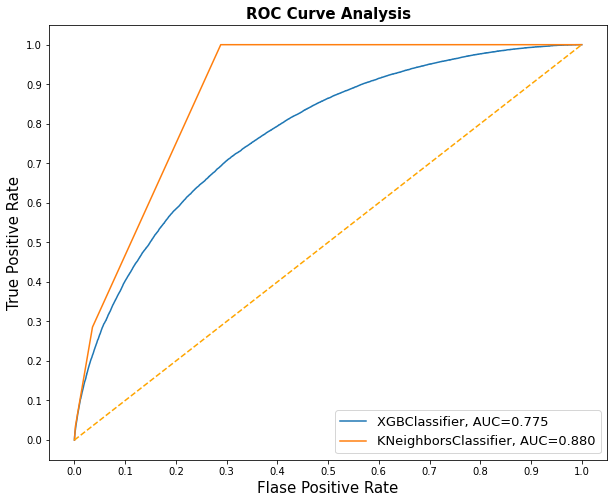

In [ ]:
fig = plt.figure(figsize=(10,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc'])
             )
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

**References**



*   https://www.kaggle.com/code/miriben/home-credit-default-risk-classification#KNeighbors-Classifier
*   https://www.kaggle.com/code/zdanielshi/home-credit-classifications-k-nearest-neighbor
*   https://www.kaggle.com/code/arezoodahesh/home-credit-default-risk-part01-eda
*   https://www.kaggle.com/code/arezoodahesh/home-credit-default-risk-part02-boosting-models#Import-Libraries





# Missing Value Trial

In [ ]:
train1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GGxJulo/application_train.csv")

train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0.0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.00,1.00
1,100003,0,0,0,0,0,0.0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.00,0.00
2,100004,0,1,1,1,1,0.0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.00,0.00
3,100006,0,0,0,0,1,0.0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.22,1.91
4,100007,0,0,1,0,1,0.0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.00,0.00


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

In [ ]:
imputation_numeric_var=train1[["DAYS_LAST_PHONE_CHANGE","CNT_FAM_MEMBERS","AMT_ANNUITY",
"AMT_GOODS_PRICE","EXT_SOURCE_2","DEF_60_CNT_SOCIAL_CIRCLE",
"OBS_60_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE",
"OBS_30_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT",
"AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY",
"AMT_REQ_CREDIT_BUREAU_HOUR","EXT_SOURCE_3","TOTALAREA_MODE","YEARS_BEGINEXPLUATATION_AVG",
"YEARS_BEGINEXPLUATATION_AVG","YEARS_BEGINEXPLUATATION_MEDI",
"YEARS_BEGINEXPLUATATION_MODE","FLOORSMAX_AVG","FLOORSMAX_MEDI",
"FLOORSMAX_MODE","LIVINGAREA_MEDI","LIVINGAREA_MODE","LIVINGAREA_AVG",
"ENTRANCES_MODE","ENTRANCES_AVG","ENTRANCES_MEDI","APARTMENTS_MODE","APARTMENTS_AVG",
"APARTMENTS_MEDI","WALLSMATERIAL_MODE","ELEVATORS_MODE","ELEVATORS_AVG","ELEVATORS_MEDI",
"NONLIVINGAREA_MEDI","NONLIVINGAREA_AVG","NONLIVINGAREA_MODE","EXT_SOURCE_1","BASEMENTAREA_MODE",
"BASEMENTAREA_AVG","BASEMENTAREA_MEDI","LANDAREA_AVG","LANDAREA_MODE","LANDAREA_MEDI",
"OWN_CAR_AGE","YEARS_BUILD_AVG","YEARS_BUILD_MODE","YEARS_BUILD_MEDI","FLOORSMIN_MEDI",
"FLOORSMIN_MODE","FLOORSMIN_AVG","LIVINGAPARTMENTS_MEDI",
"LIVINGAPARTMENTS_AVG","LIVINGAPARTMENTS_MODE","NONLIVINGAPARTMENTS_MEDI",
"NONLIVINGAPARTMENTS_AVG","NONLIVINGAPARTMENTS_MODE","COMMONAREA_MODE",
"COMMONAREA_AVG","COMMONAREA_MEDI"]]

In [ ]:
imputation_numeric_var

,DAYS_LAST_PHONE_CHANGE,CNT_FAM_MEMBERS,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_2,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR,...,FLOORSMIN_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MODE,COMMONAREA_MODE,COMMONAREA_AVG,COMMONAREA_MEDI
0,-1134.0,1.0,24700.5,351000.0,0.262949,2.0,2.0,2.0,2.0,1.0,...,0.1250,0.0205,0.0202,0.0220,0.0000,0.0000,0.0,0.0144,0.0143,0.0144
1,-828.0,2.0,35698.5,1129500.0,0.622246,0.0,1.0,0.0,1.0,0.0,...,0.3333,0.0787,0.0773,0.0790,0.0039,0.0039,0.0,0.0497,0.0605,0.0608
2,-815.0,1.0,6750.0,135000.0,0.555912,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-617.0,2.0,29686.5,297000.0,0.650442,0.0,2.0,0.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1106.0,1.0,21865.5,513000.0,0.322738,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,-273.0,1.0,27558.0,225000.0,0.681632,0.0,0.0,0.0,0.0,NaN,...,0.2708,0.1509,0.1484,0.0882,0.0757,0.0753,0.0,0.0172,0.0202,0.0203
307507,0.0,1.0,12001.5,225000.0,0.115992,0.0,0.0,0.0,0.0,NaN,...,0.1250,0.0205,0.0202,0.0220,0.0000,0.0000,0.0,0.0022,0.0022,0.0022
307508,-1909.0,1.0,29979.0,585000.0,0.535722,0.0,6.0,0.0,6.0,1.0,...,0.2083,0.0855,0.0841,0.0918,0.0000,0.0000,0.0,0.0124,0.0123,0.0124
307509,-322.0,2.0,20205.0,319500.0,0.514163,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# imputer = IterativeImputer(random_state=0)
# imputed = imputer.fit_transform(imputation_numeric_var)

In [ ]:
# imputation_numeric_var = pd.DataFrame(imputer.fit_transform(imputation_numeric_var), columns = imputation_numeric_var.columns)
# imputation_numeric_var